<a href="https://colab.research.google.com/github/IAMDSVSSANGRAL/classificationcapestone/blob/main/Cardiovascular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/IAMDSVSSANGRAL/classificationcapestone

# **Problem Statement**


The objective of this project is to develop a machine learning model that can predict whether a patient is at risk of developing coronary heart disease (CHD) within the next 10 years. The dataset used for this project contains records of over 4,000 patients from an ongoing cardiovascular study in Framingham, Massachusetts. Each record consists of 15 attributes, including demographic, behavioral, and medical risk factors.

The primary task is binary classification, where the target variable is "TenYearCHD," indicating whether a patient is at risk of CHD (1) or not (0). The features include attributes such as age, sex, education level, smoking status, blood pressure measurements, cholesterol levels, and more. The dataset may also contain missing values that need to be handled appropriately.

By building an accurate predictive model, this project aims to assist healthcare professionals in identifying individuals at higher risk of CHD, allowing for early intervention and tailored healthcare recommendations to reduce the incidence of cardiovascular diseases.

Key objectives for the project include data preprocessing, feature engineering, model selection, hyperparameter tuning, and evaluating the model's performance using appropriate metrics. The success of this project will be measured by the model's ability to predict CHD risk with a high degree of accuracy and reliability.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [163]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [164]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

#assinging the path
path = "/content/drive/MyDrive/Santa/classification - capestone/data_cardiovascular_risk.csv"

#read data from a CSV file into a DataFrame.
data_raw = pd.read_csv(path)

#create a copy of raw data
df = data_raw.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [165]:
# Dataset First Look
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

### Dataset Rows & Columns count

In [166]:
# Dataset Rows & Columns count
rows, columns = df.shape

# Print the number of rows and columns
print("Number of Rows:", rows)
print("Number of Columns:", columns)

Number of Rows: 3390
Number of Columns: 17


### Dataset Information

In [167]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [168]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()

# Print the count of duplicate values
print("Duplicate Value Count:", duplicate_count)


Duplicate Value Count: 0


#### Missing Values/Null Values

In [169]:
# Missing Values/Null Values Count
missing_values_count = df.isnull().sum()

# Print the count of missing values for each column
print("Missing Values Count:")
print(missing_values_count)


Missing Values Count:
id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


In [170]:
!pip install missingno

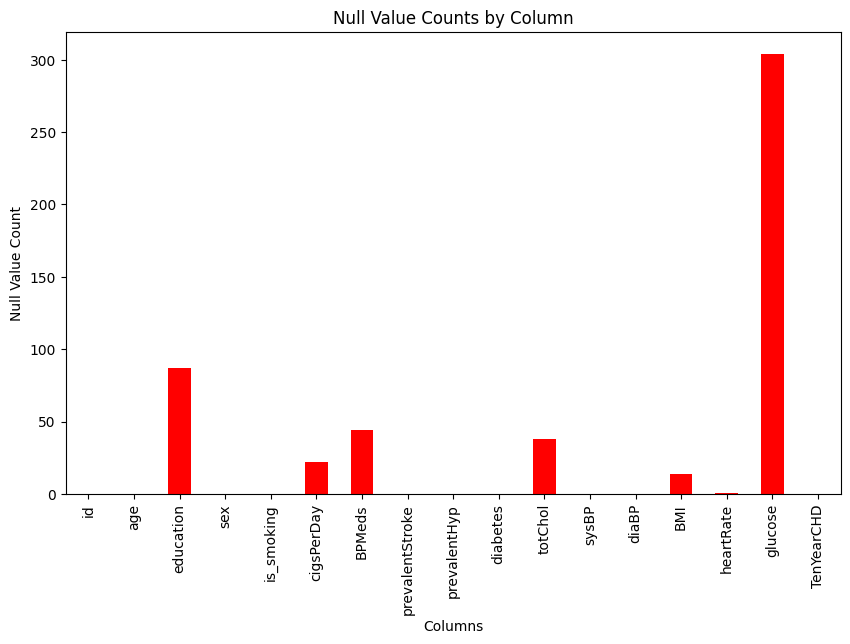

In [171]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
missing_values_count.plot(kind='bar', color='red')
plt.xlabel('Columns')
plt.ylabel('Null Value Count')
plt.title('Null Value Counts by Column')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility
plt.show()

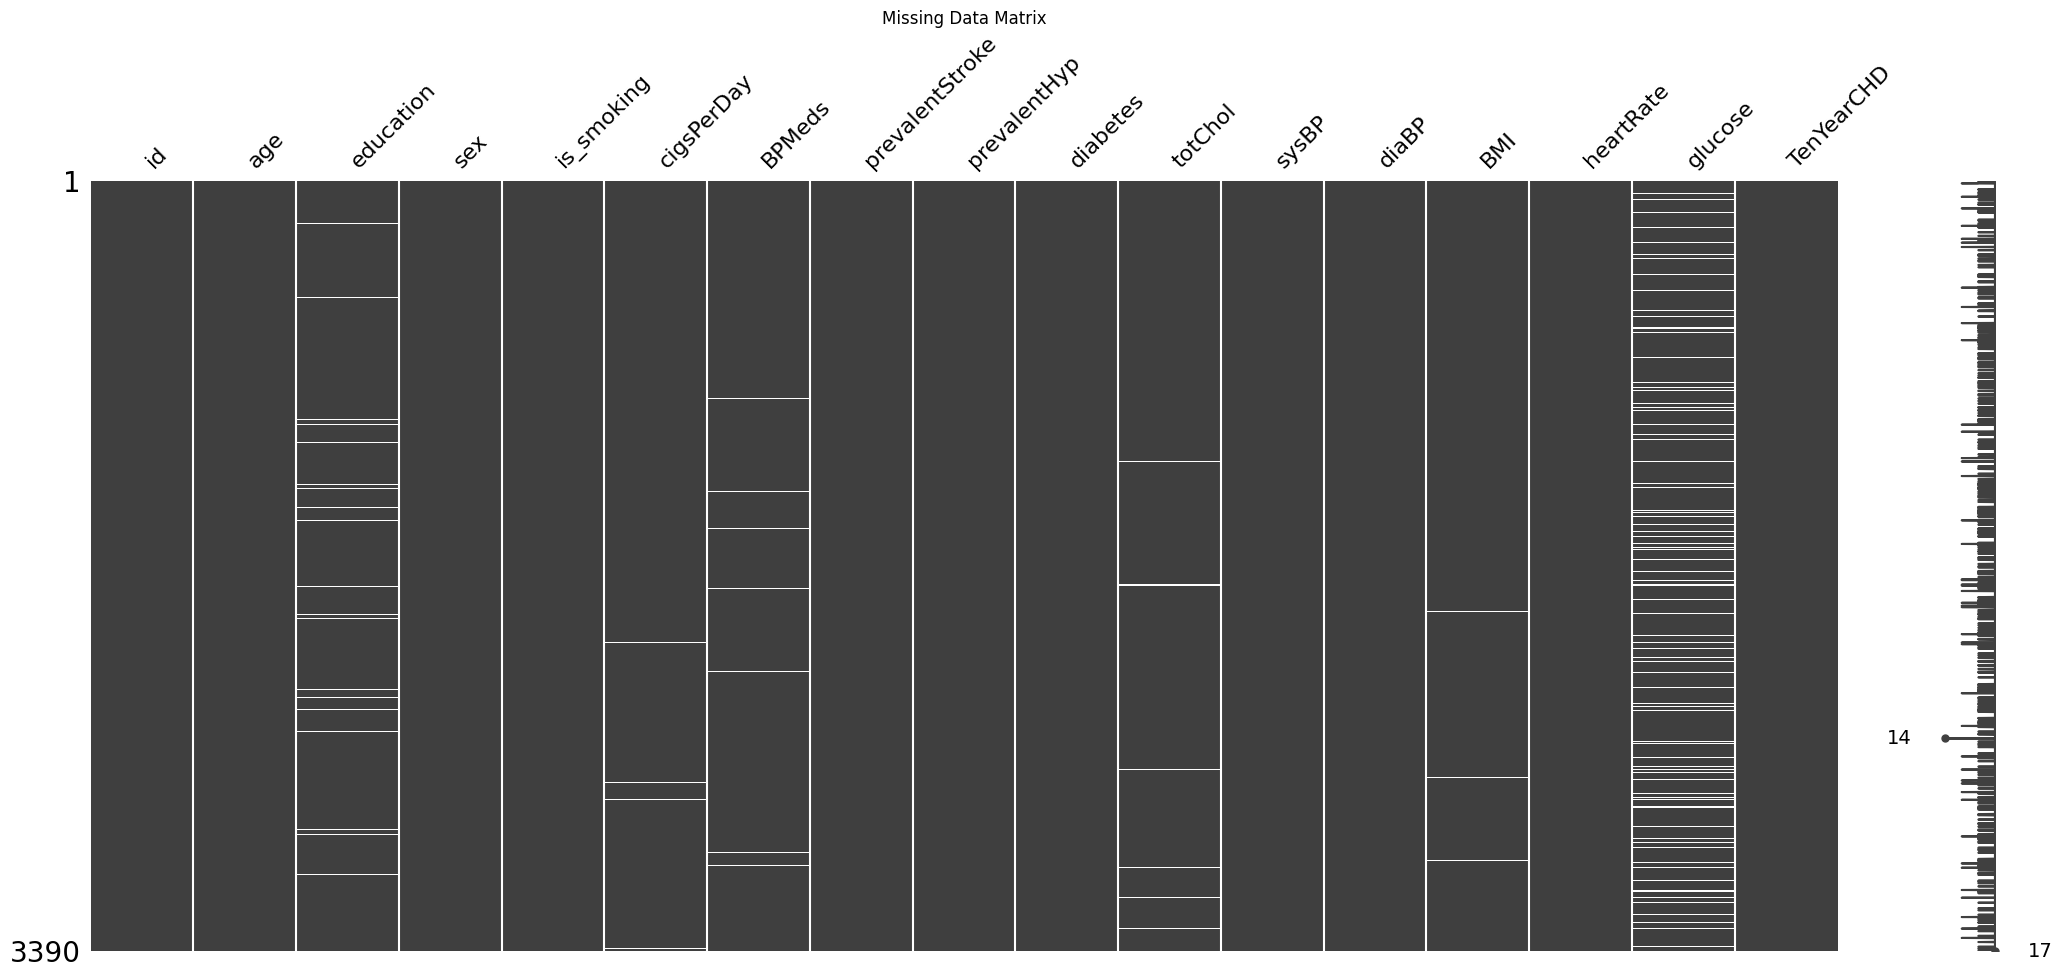

In [172]:
# Visualizing the missing values
# Create a missing data matrix visualization
msno.matrix(df)
plt.title('Missing Data Matrix')
plt.show()

### What did you know about your dataset?

There are several insights that can be gathered from the information provided about your dataset:

1. **Number of Entries:**
   - The dataset contains 3,390 entries.

2. **Columns and Data Types:**
   - There are 17 columns in the dataset.
   - The data types include integers (`int64`), floats (`float64`), and objects (`object`).

3. **Missing Values:**
   - Some columns have missing values (non-null counts are less than the total number of entries).
   - Columns with missing values include 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', and 'glucose'.

4. **Categorical Columns:**
   - 'sex' and 'is_smoking' are categorical columns represented as objects. You may want to check the unique values in these columns and potentially convert them to numerical values if needed.

5. **Numerical Columns:**
   - Columns such as 'age', 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose' are numerical.

6. **Target Variable:**
   - 'TenYearCHD' is the target variable for binary classification, indicating whether a patient is at risk of CHD in the next 10 years.

7. **Summary Statistics:**
   - Descriptive statistics such as mean, standard deviation, minimum, and maximum are not provided, but calculating these would be useful for understanding the distribution of numerical features.

8. **Potential Preprocessing Steps:**
   - Imputation: Consider imputing missing values for columns like 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', and 'glucose'.
   - Categorical Encoding: Convert categorical columns ('sex' and 'is_smoking') into numerical format, possibly using one-hot encoding or label encoding.
   - Feature Scaling: Depending on the algorithms you plan to use, consider scaling numerical features.

These initial insights provide a foundation for further exploration and preprocessing of the dataset. You can visualize the distribution of numerical features, explore relationships between variables, and handle missing values before building and training your machine learning model.

## ***2. Understanding Your Variables***

In [173]:
# Assuming data_raw is your DataFrame
columns_list = df.columns

# Print the list of columns
print("Dataset Columns:")
print(columns_list)

Dataset Columns:
Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [174]:
# Dataset Describe
df.describe(include="all")

id          age    education   sex is_smoking   cigsPerDay  \
count   3390.000000  3390.000000  3303.000000  3390       3390  3368.000000   
unique          NaN          NaN          NaN     2          2          NaN   
top             NaN          NaN          NaN     F         NO          NaN   
freq            NaN          NaN          NaN  1923       1703          NaN   
mean    1694.500000    49.542183     1.970936   NaN        NaN     9.069477   
std      978.753033     8.592878     1.019081   NaN        NaN    11.879078   
min        0.000000    32.000000     1.000000   NaN        NaN     0.000000   
25%      847.250000    42.000000     1.000000   NaN        NaN     0.000000   
50%     1694.500000    49.000000     2.000000   NaN        NaN     0.000000   
75%     2541.750000    56.000000     3.000000   NaN        NaN    20.000000   
max     3389.000000    70.000000     4.000000   NaN        NaN    70.000000   

             BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count   3346.000000      3390.000000   3390.000000  3390.000000  3352.000000   
unique          NaN              NaN           NaN          NaN          NaN   
top             NaN              NaN           NaN          NaN          NaN   
freq            NaN              NaN           NaN          NaN          NaN   
mean       0.029886         0.006490      0.315339     0.025664   237.074284   
std        0.170299         0.080309      0.464719     0.158153    45.247430   
min        0.000000         0.000000      0.000000     0.000000   107.000000   
25%        0.000000         0.000000      0.000000     0.000000   206.000000   
50%        0.000000         0.000000      0.000000     0.000000   234.000000   
75%        0.000000         0.000000      1.000000     0.000000   264.000000   
max        1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count   3390.00000  3390.000000  3376.000000  3389.000000  3086.000000   
unique         NaN          NaN          NaN          NaN          NaN   
top            NaN          NaN          NaN          NaN          NaN   
freq           NaN          NaN          NaN          NaN          NaN   
mean     132.60118    82.883038    25.794964    75.977279    82.086520   
std       22.29203    12.023581     4.115449    11.971868    24.244753   
min       83.50000    48.000000    15.960000    45.000000    40.000000   
25%      117.00000    74.500000    23.020000    68.000000    71.000000   
50%      128.50000    82.000000    25.380000    75.000000    78.000000   
75%      144.00000    90.000000    28.040000    83.000000    87.000000   
max      295.00000   142.500000    56.800000   143.000000   394.000000   

         TenYearCHD  
count   3390.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       0.150737  
std        0.357846  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

### Variables Description

Answer Here

### Check Unique Values for each variable.

In [175]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Unique values in column "{column}":')
    print(unique_values)
    print('\n')

Unique values in column "id":
[   0    1    2 ... 3387 3388 3389]


Unique values in column "age":
[64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]


Unique values in column "education":
[ 2.  4.  1.  3. nan]


Unique values in column "sex":
['F' 'M']


Unique values in column "is_smoking":
['YES' 'NO']


Unique values in column "cigsPerDay":
[ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]


Unique values in column "BPMeds":
[ 0. nan  1.]


Unique values in column "prevalentStroke":
[0 1]


Unique values in column "prevalentHyp":
[0 1]


Unique values in column "diabetes":
[0 1]


Unique values in column "totChol":
[221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346.
 202. 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [176]:
# Assuming data_raw is your DataFrame
columns_to_drop = ['id']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Display the first few rows of the cleaned DataFrame
df.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0   F        YES         3.0     0.0                0   
1   36        4.0   M         NO         0.0     0.0                0   
2   46        1.0   F        YES        10.0     0.0                0   
3   50        1.0   M        YES        20.0     0.0                0   
4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [177]:
!pip install dataprep

In [178]:
from dataprep.eda import create_report
report = create_report(df)

DataPrep Report
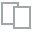
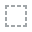
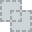
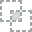
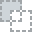
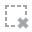
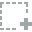
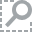
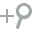
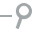
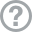
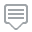
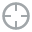
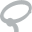
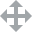
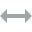
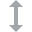
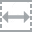
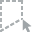
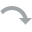
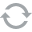
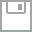
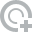
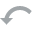
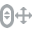
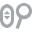
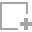
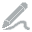
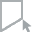
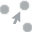
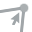
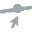

In [179]:
report

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


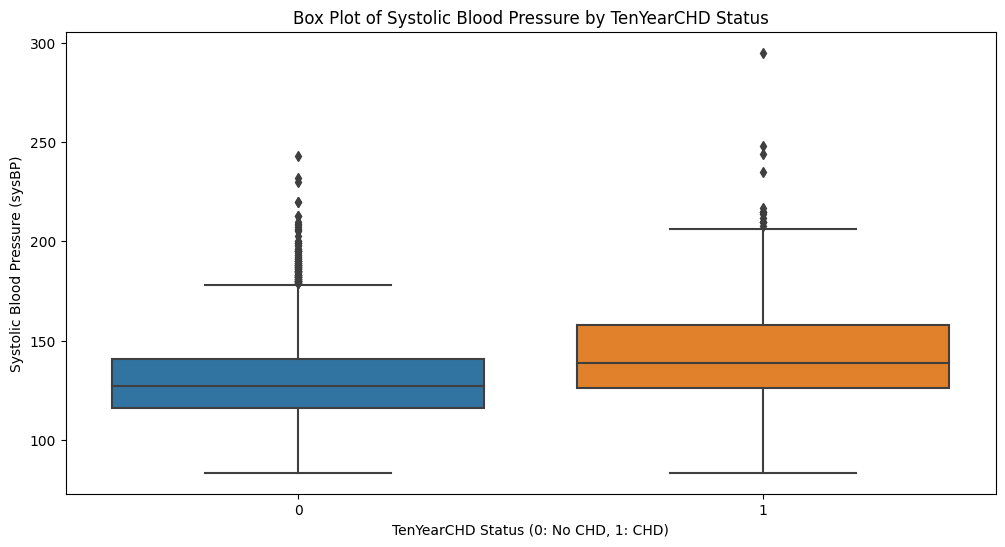

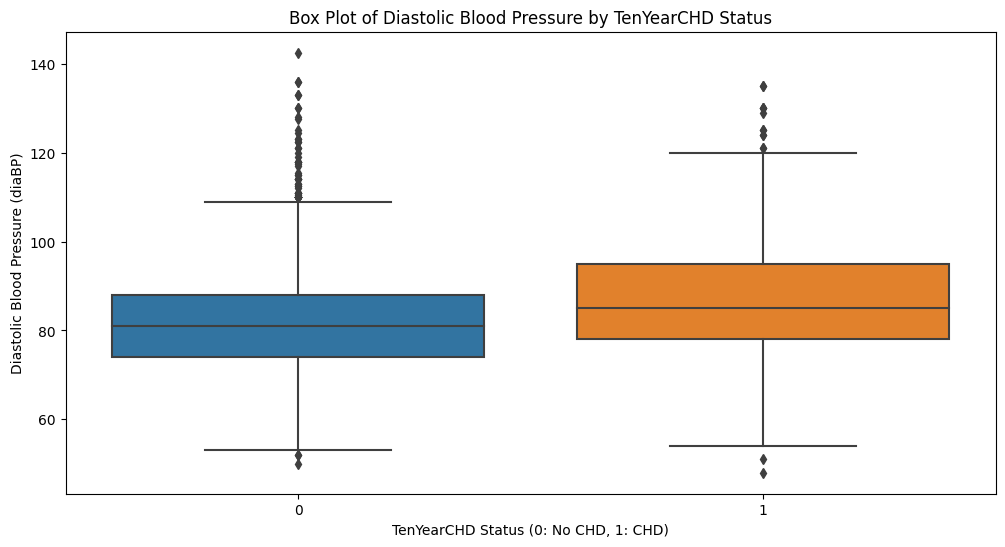

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for Systolic Blood Pressure (sysBP)
plt.figure(figsize=(12, 6))
sns.boxplot(x='TenYearCHD', y='sysBP', data=df)
plt.title('Box Plot of Systolic Blood Pressure by TenYearCHD Status')
plt.xlabel('TenYearCHD Status (0: No CHD, 1: CHD)')
plt.ylabel('Systolic Blood Pressure (sysBP)')
plt.show()

# Box plot for Diastolic Blood Pressure (diaBP)
plt.figure(figsize=(12, 6))
sns.boxplot(x='TenYearCHD', y='diaBP', data=df)
plt.title('Box Plot of Diastolic Blood Pressure by TenYearCHD Status')
plt.xlabel('TenYearCHD Status (0: No CHD, 1: CHD)')
plt.ylabel('Diastolic Blood Pressure (diaBP)')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

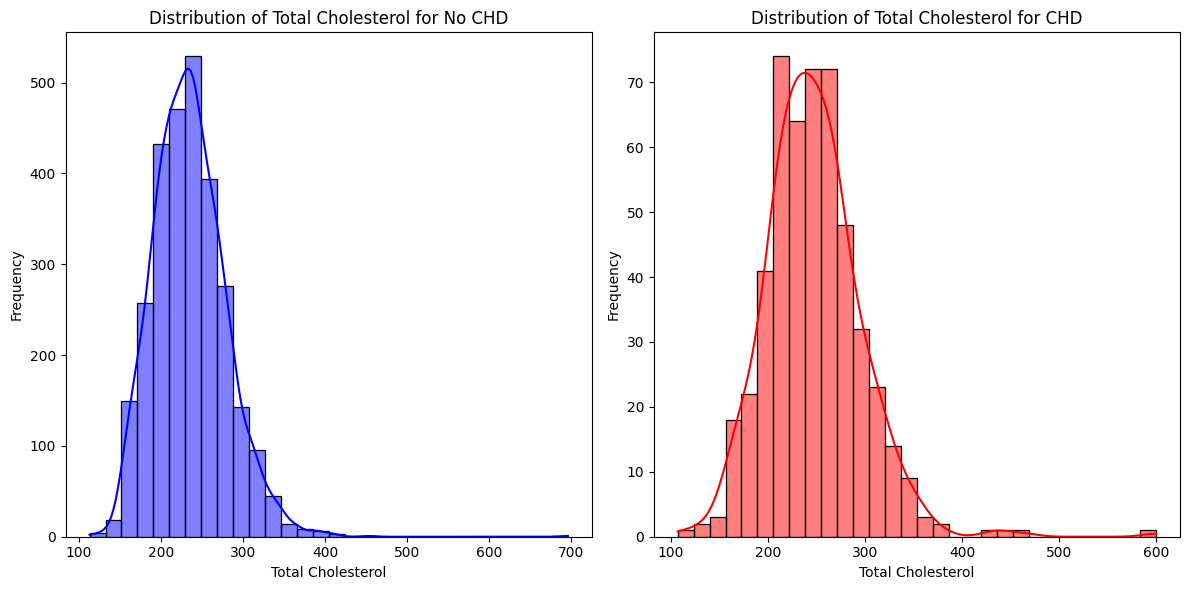

In [182]:
# Chart - 2 visualization code
# Set up the figure with subplots
plt.figure(figsize=(12, 6))

# Plot histogram for CHD = 0 (No CHD)
plt.subplot(1, 2, 1)
sns.histplot(df[df['TenYearCHD'] == 0]['totChol'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Cholesterol for No CHD')
plt.xlabel('Total Cholesterol')
plt.ylabel('Frequency')

# Plot histogram for CHD = 1 (With CHD)
plt.subplot(1, 2, 2)
sns.histplot(df[df['TenYearCHD'] == 1]['totChol'], bins=30, kde=True, color='red')
plt.title('Distribution of Total Cholesterol for CHD')
plt.xlabel('Total Cholesterol')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

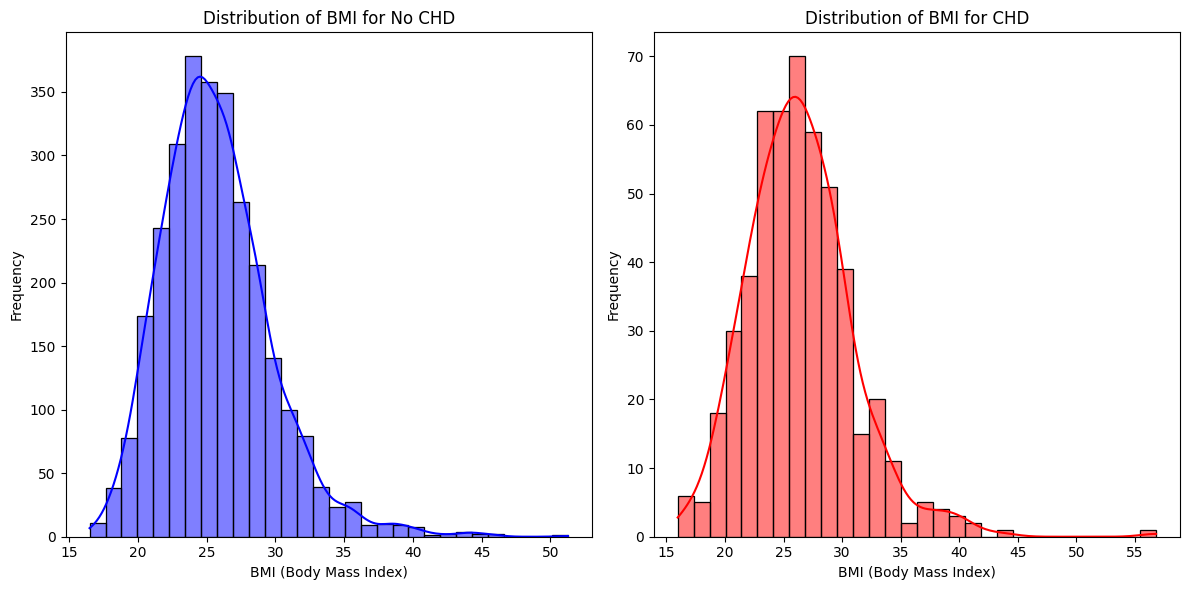

In [183]:
# Chart - 3 visualization code
# Set up the figure with subplots
plt.figure(figsize=(12, 6))

# Plot histogram for CHD = 0 (No CHD)
plt.subplot(1, 2, 1)
sns.histplot(df[df['TenYearCHD'] == 0]['BMI'], bins=30, kde=True, color='blue')
plt.title('Distribution of BMI for No CHD')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Frequency')

# Plot histogram for CHD = 1 (With CHD)
plt.subplot(1, 2, 2)
sns.histplot(df[df['TenYearCHD'] == 1]['BMI'], bins=30, kde=True, color='red')
plt.title('Distribution of BMI for CHD')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

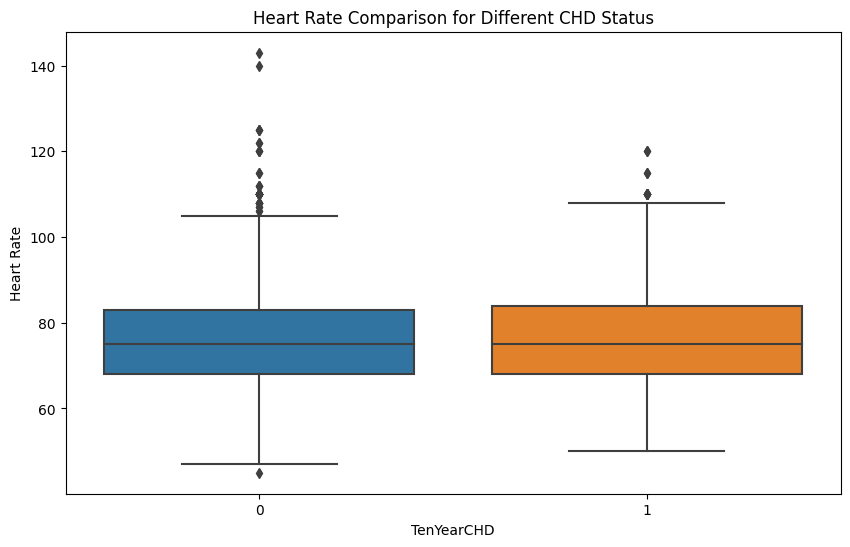

In [184]:
# Chart - 4 visualization code
# Set up the figure with subplots
plt.figure(figsize=(10, 6))

# Box plot for heart rates based on CHD status
sns.boxplot(x='TenYearCHD', y='heartRate', data=df)
plt.title('Heart Rate Comparison for Different CHD Status')
plt.xlabel('TenYearCHD')
plt.ylabel('Heart Rate')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

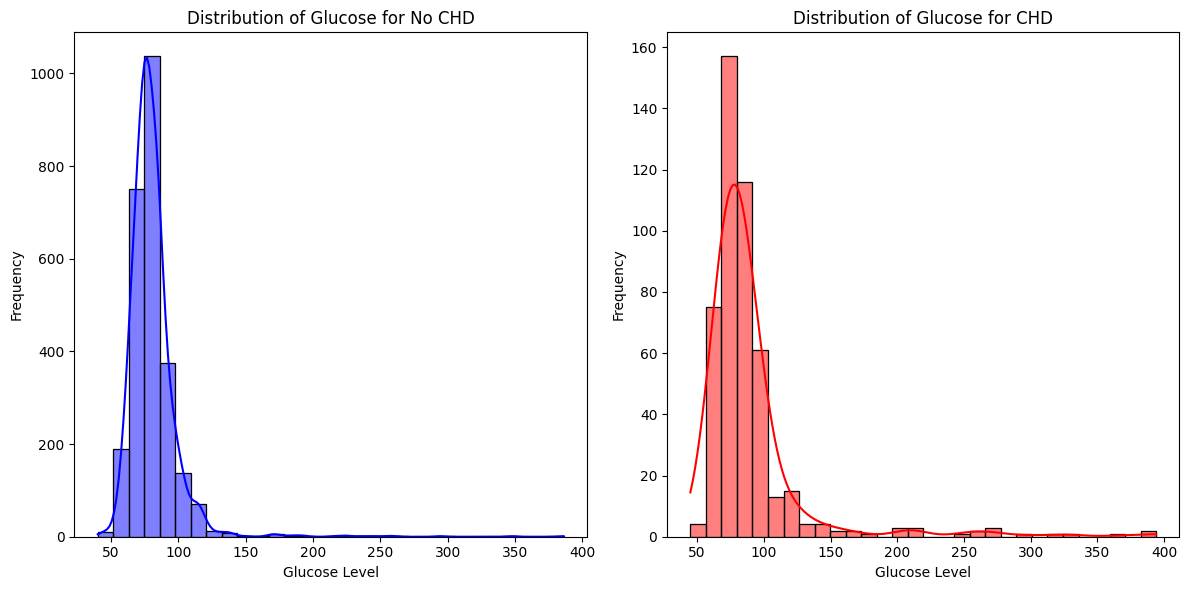

In [185]:
# Chart - 5 visualization code
# Set up the figure with subplots
plt.figure(figsize=(12, 6))

# Plot histogram for CHD = 0 (No CHD)
plt.subplot(1, 2, 1)
sns.histplot(df[df['TenYearCHD'] == 0]['glucose'], bins=30, kde=True, color='blue')
plt.title('Distribution of Glucose for No CHD')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')

# Plot histogram for CHD = 1 (With CHD)
plt.subplot(1, 2, 2)
sns.histplot(df[df['TenYearCHD'] == 1]['glucose'], bins=30, kde=True, color='red')
plt.title('Distribution of Glucose for CHD')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


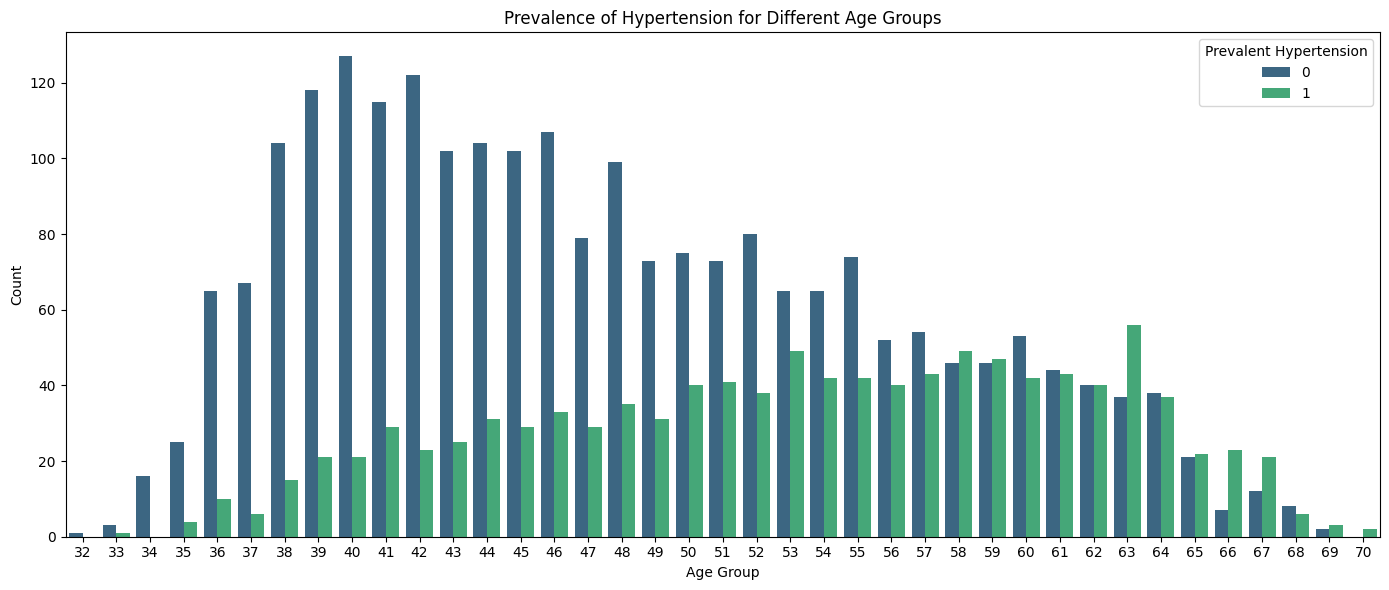

In [187]:
# Chart - 6 visualization code

# Set up the figure with subplots
plt.figure(figsize=(14, 6))

# Plot the prevalence of hypertension for different age groups
sns.countplot(x='age', hue='prevalentHyp', data=df, palette='viridis')
plt.title('Prevalence of Hypertension for Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Prevalent Hypertension')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

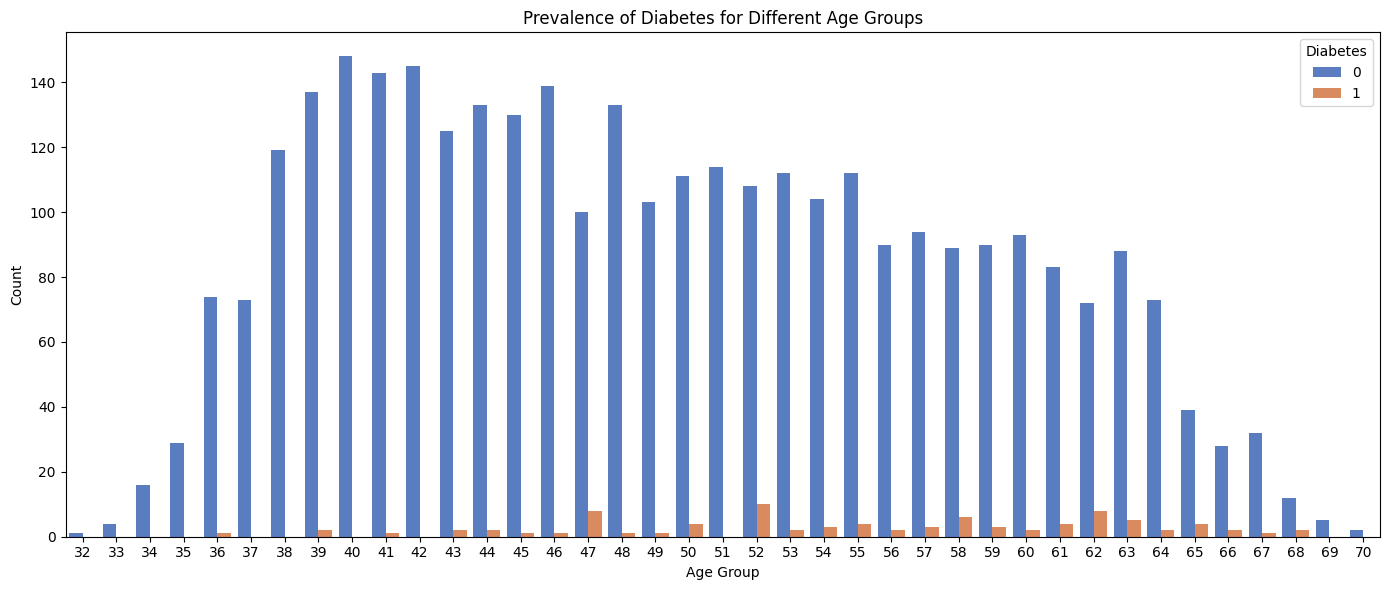

In [188]:
# Chart - 7 visualization code
# Set up the figure with subplots
plt.figure(figsize=(14, 6))
# Plot the prevalence of diabetes for different age groups
sns.countplot(x='age', hue='diabetes', data=df, palette='muted')
plt.title('Prevalence of Diabetes for Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Diabetes')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

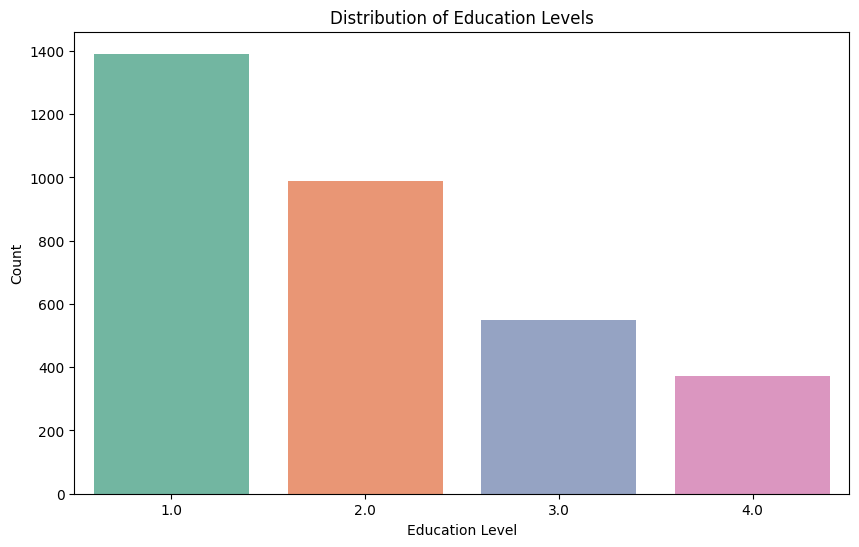

In [189]:
# Chart - 8 visualization code
# Plot the distribution of education levels
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=df, palette='Set2')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [190]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [191]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [192]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [193]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13 - Distribution Plot

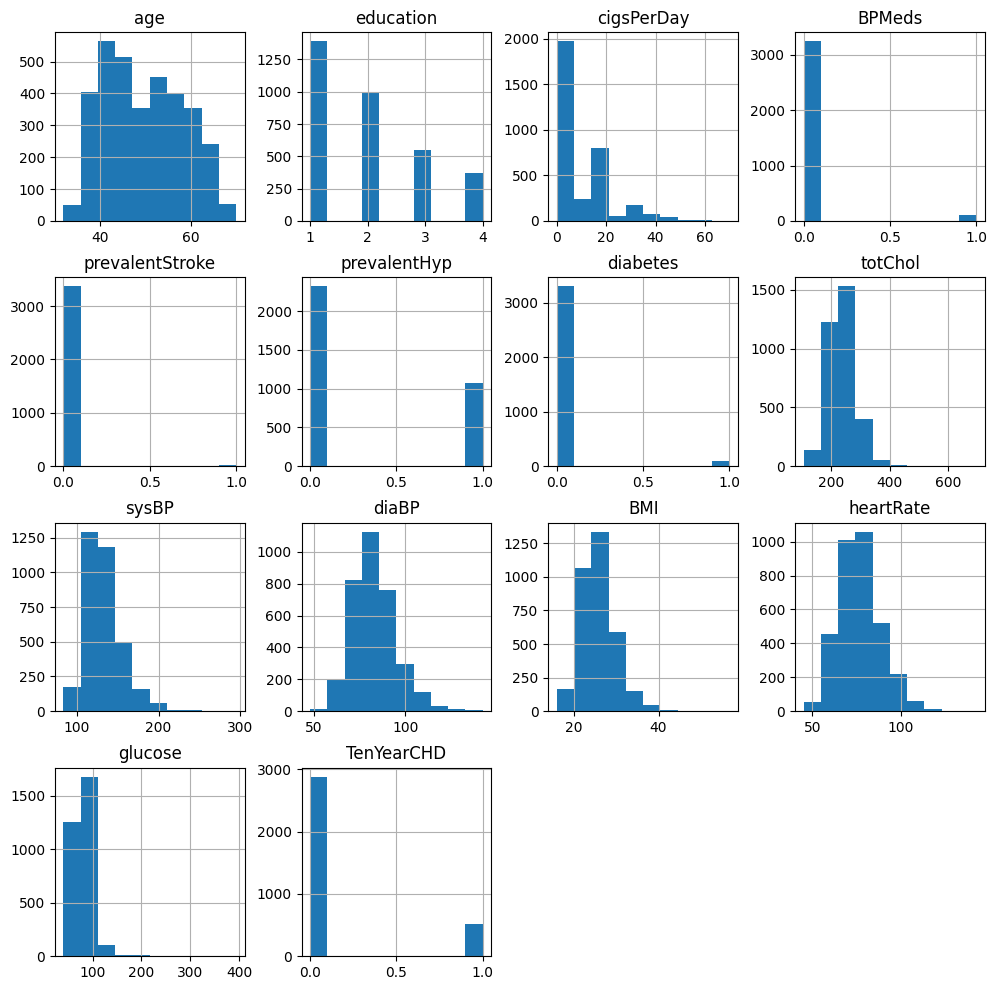

In [194]:
# Visualizing distributions using Histograms:
df.hist(figsize=(12, 12), grid=True);

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

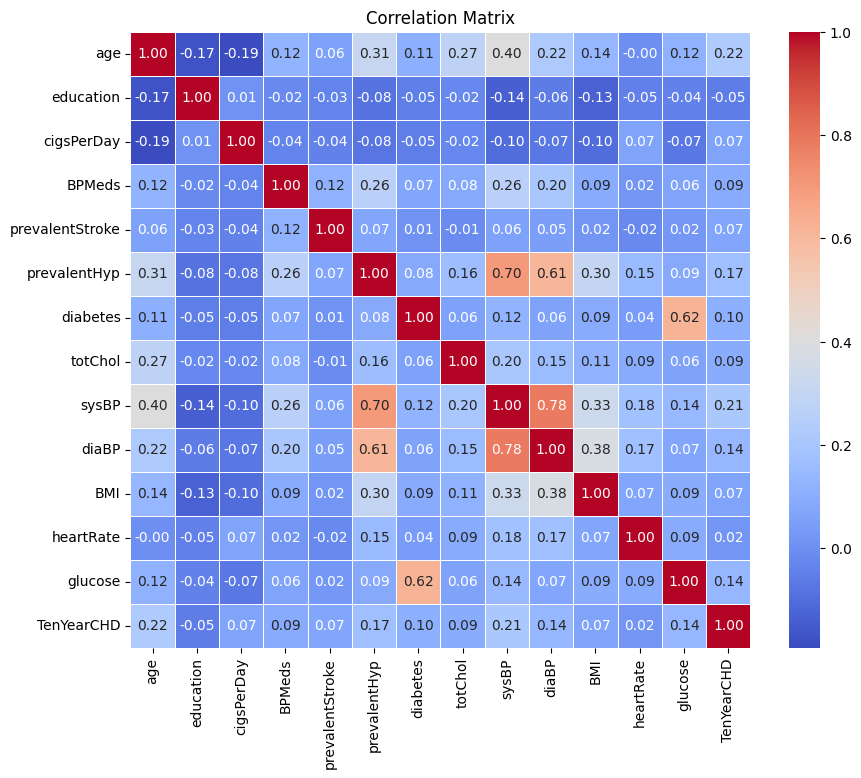

In [195]:
# Correlation Heatmap visualization code

# Calculate the correlation matrix
correlation_matrix = df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [196]:
# # Create a pair plot
# sns.pairplot(df)
# plt.show()

In [197]:
# Assuming data_raw is your DataFrame
columns_to_drop = ['education']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Display the first few rows of the cleaned DataFrame
df.head()

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0   64   F        YES         3.0     0.0                0             0   
1   36   M         NO         0.0     0.0                0             1   
2   46   F        YES        10.0     0.0                0             0   
3   50   M        YES        20.0     0.0                0             1   
4   64   F        YES        30.0     0.0                0             0   

   diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
0         0    221.0  148.0   85.0    NaN       90.0     80.0           1  
1         0    212.0  168.0   98.0  29.77       72.0     75.0           0  
2         0    250.0  116.0   71.0  20.35       88.0     94.0           0  
3         0    233.0  158.0   88.0  28.26       68.0     94.0           1  
4         0    241.0  136.5   85.0  26.42       70.0     77.0           0

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [198]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [199]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [200]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [201]:
df.isna().sum()

age                  0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [202]:
df[df['cigsPerDay'].isna()].head()

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
422   55   F        YES         NaN     0.0                0             1   
466   45   M        YES         NaN     0.0                0             1   
469   42   M        YES         NaN     0.0                0             0   
491   61   F        YES         NaN     0.0                0             1   
538   41   F        YES         NaN     0.0                0             0   

     diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
422         0    213.0  163.0   91.0  28.66       69.0     66.0           0  
466         0    170.0  145.5   99.0  26.74       83.0     85.0           0  
469         0    196.0  123.0   73.0  22.06       66.0      NaN           0  
491         0    356.0  168.0   98.0  27.30      103.0    106.0           0  
538         0    171.0  135.0   82.5  24.35       79.0     82.0           0

In [203]:
df[df['BPMeds'].isna()].head()

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
8     41   F        YES        20.0     NaN                0             0   
102   68   F         NO         0.0     NaN                0             0   
128   67   F         NO         0.0     NaN                0             0   
174   60   F         NO         0.0     NaN                0             1   
194   56   F         NO         0.0     NaN                0             1   

     diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
8           0    220.0  126.0   78.0  20.70       86.0     79.0           0  
102         0    257.0  144.0   95.0  29.25       80.0     77.0           0  
128         0    261.0  117.0   63.0  22.55       75.0     83.0           0  
174         0    273.0  176.0   84.0  22.17       66.0     79.0           0  
194         0    391.0  126.0   84.0  24.83       80.0     78.0           0

In [204]:
df[df['totChol'].isna()].head()

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
10    61   F         NO         0.0     0.0                0             1   
69    65   M         NO         0.0     0.0                0             0   
254   52   F         NO         0.0     0.0                0             0   
290   37   F        YES        30.0     0.0                0             0   
554   38   F        YES         3.0     1.0                0             1   

     diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
10          0      NaN  185.0  121.0  35.22       80.0      NaN           0  
69          0      NaN  152.5   97.5  28.35       65.0     73.0           0  
254         0      NaN  129.0   83.0  32.57       65.0      NaN           0  
290         0      NaN  115.0   79.0  28.41       85.0      NaN           0  
554         0      NaN  125.0   80.0  22.79       98.0      NaN           0

In [205]:
df[df['BMI'].isna()].head()

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0      64   F        YES         3.0     0.0                0             0   
54     63   M        YES        20.0     0.0                1             1   
271    47   F         NO         0.0     0.0                0             0   
720    61   F         NO         0.0     0.0                0             1   
1057   64   M        YES        20.0     0.0                0             0   

      diabetes  totChol  sysBP  diaBP  BMI  heartRate  glucose  TenYearCHD  
0            0    221.0  148.0   85.0  NaN       90.0     80.0           1  
54           0    213.0  163.0   94.0  NaN       76.0     69.0           1  
271          0    195.0  126.0   75.0  NaN       60.0      NaN           1  
720          0    300.0  150.5   89.0  NaN       68.0     72.0           1  
1057         0    225.0  120.0   75.0  NaN       70.0     94.0           0

In [206]:
df[df['glucose'].isna()].head()

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
9    55   F         NO         0.0     0.0                0             1   
10   61   F         NO         0.0     0.0                0             1   
36   46   F         NO         0.0     0.0                0             0   
38   41   F        YES         9.0     1.0                1             1   
55   51   F         NO         0.0     0.0                0             1   

    diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
9          0    326.0  144.0   81.0  25.71       85.0      NaN           0  
10         0      NaN  185.0  121.0  35.22       80.0      NaN           0  
36         0    193.0  106.5   70.5  26.18       75.0      NaN           0  
38         0    180.0  114.0   70.0  22.41       92.0      NaN           0  
55         0    351.0  134.0   97.5  21.66      100.0      NaN           0

In [207]:
df[df['heartRate'].isna()].head()

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
1388   64   M        YES        18.0     0.0                0             1   

      diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
1388         0    219.0  172.5   75.0  29.29        NaN     91.0           1

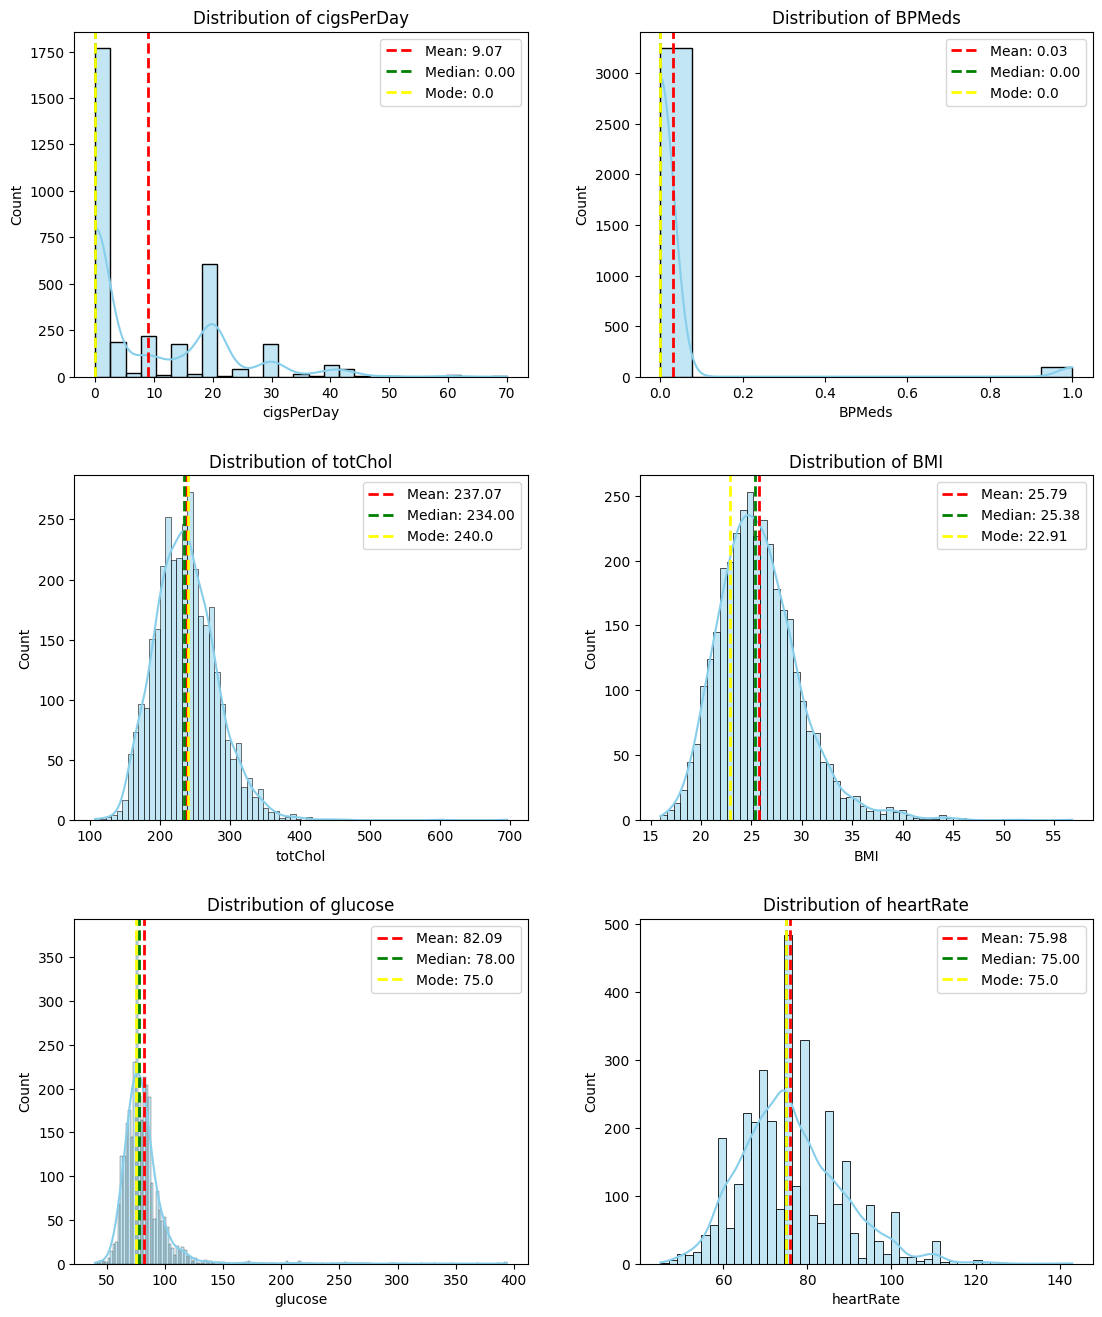

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data_raw is your DataFrame

# List of columns to plot
columns_to_plot = ['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose', 'heartRate']

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 14))
fig.tight_layout(pad=5.0)

for i, column in enumerate(columns_to_plot):
    # Plot distribution
    sns.histplot(data_raw[column], kde=True, ax=axes[i // 2, i % 2], color='skyblue')

    # Annotate with mean, median, mode
    mean_value = data_raw[column].mean()
    median_value = data_raw[column].median()
    mode_value = data_raw[column].mode().values[0]

    axes[i // 2, i % 2].axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    axes[i // 2, i % 2].axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
    axes[i // 2, i % 2].axvline(mode_value, color='yellow', linestyle='dashed', linewidth=2, label=f'Mode: {mode_value}')

    axes[i // 2, i % 2].legend()
    axes[i // 2, i % 2].set_title(f'Distribution of {column}')

plt.show()

In [209]:
# Calculate the mean of a specific column
column_mean = df['cigsPerDay'].mean()

print(f"Mean of 'cigsPerDay': {column_mean}")

# Replace the Nan values with Mean.
df['cigsPerDay'].fillna(column_mean, inplace=True)

Mean of 'cigsPerDay': 9.069477434679335


In [210]:
# Calculate the mean of a heartRate column
column_mean = df['heartRate'].mean()

print(f"Mean of 'heartRate': {column_mean}")

# Replace the Nan values with mean.
df['heartRate'].fillna(column_mean, inplace=True)

Mean of 'heartRate': 75.97727943346119


In [211]:
# Calculate the mean of a totChol column
column_median = df['totChol'].median()

print(f"Median of 'totChol': {column_median}")

# Replace the Nan values with Median.
df['totChol'].fillna(column_median, inplace=True)

Median of 'totChol': 234.0


In [212]:
# Calculate the mean of a BMI column
column_median = df['BMI'].median()

print(f"Median of 'BMI': {column_median}")

# Replace the Nan values with Median.
df['BMI'].fillna(column_median, inplace=True)

Median of 'BMI': 25.38


In [213]:
# Calculate the mean of a glucose column
column_median = df['glucose'].median()

print(f"Median of 'glucose': {column_median}")

# Replace the Nan values with Median.
df['glucose'].fillna(column_median, inplace=True)

Median of 'glucose': 78.0


In [214]:
# Calculate the mode of a BPMeds column
column_mode = df['BPMeds'].mode().values[0]

print(f"Mode of BPMeds: {column_mode}")

# Replace the Nan values with Mode.
df['BPMeds'].fillna(column_mode, inplace=True)

Mode of BPMeds: 0.0


In [215]:
df.isna().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   object 
 2   is_smoking       3390 non-null   object 
 3   cigsPerDay       3390 non-null   float64
 4   BPMeds           3390 non-null   float64
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3390 non-null   float64
 9   sysBP            3390 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3390 non-null   float64
 12  heartRate        3390 non-null   float64
 13  glucose          3390 non-null   float64
 14  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 397.4+ KB


In [217]:
# Select the non desired columns from 'df'
non_desired_column = ['age','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']

# Create a new DataFrame with the selected columns
data = df[non_desired_column]

data.head()

age sex is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0   64   F        YES     0.0                0             0         0   
1   36   M         NO     0.0                0             1         0   
2   46   F        YES     0.0                0             0         0   
3   50   M        YES     0.0                0             1         0   
4   64   F        YES     0.0                0             0         0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [218]:
# Select the desired columns from 'df'
desired_columns = ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

# Create a new DataFrame with the selected columns
data_a = df[desired_columns]

data_a.head()

cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose
0         3.0    221.0  148.0   85.0  25.38       90.0     80.0
1         0.0    212.0  168.0   98.0  29.77       72.0     75.0
2        10.0    250.0  116.0   71.0  20.35       88.0     94.0
3        20.0    233.0  158.0   88.0  28.26       68.0     94.0
4        30.0    241.0  136.5   85.0  26.42       70.0     77.0

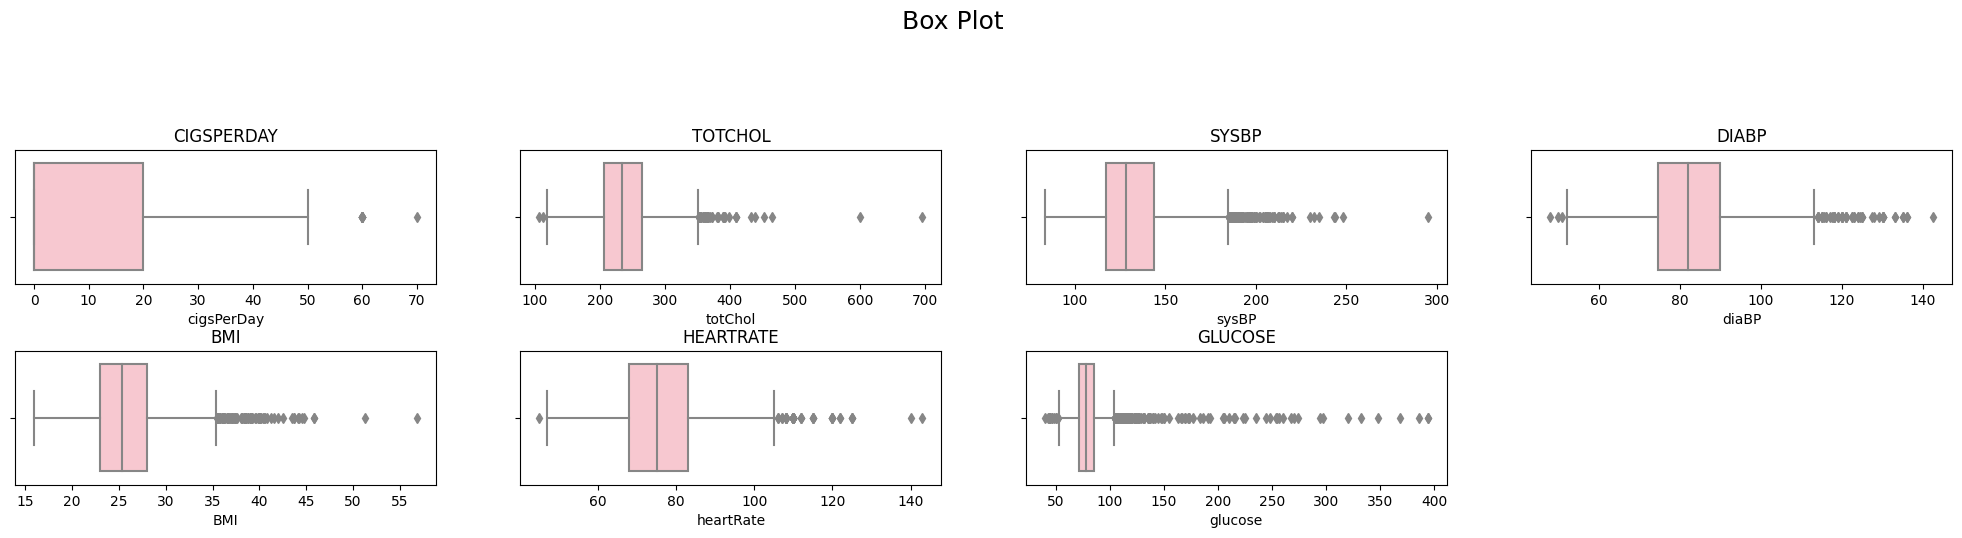

In [219]:
# Handling Outliers & Outlier treatments
df_2 = data_a.copy()

col_list = list(df_2.describe().columns)

#find the outliers using boxplot
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=df[ticker],color='pink', ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

In [220]:
# Handling Outliers & Outlier treatments

def find_outliers_iqr(df_2):
    # Calculate the first quartile (Q1) and third quartile (Q3) for each column
    q1 = df_2.quantile(0.25)
    q3 = df_2.quantile(0.75)

    # Calculate the interquartile range (IQR) for each column
    iqr = q3 - q1

    # Calculate the lower and upper bounds for outliers for each column
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Check for outliers in each column and count the number of outliers
    outliers_count = (df_2 < lower_bound) | (df_2 > upper_bound)
    num_outliers = outliers_count.sum()

    return num_outliers

outliers_per_column = find_outliers_iqr(df_2)
print("Number of outliers per column:")
print(outliers_per_column.sort_values(ascending = False))

Number of outliers per column:
glucose       214
sysBP         105
BMI            79
heartRate      64
diaBP          58
totChol        43
cigsPerDay      9
dtype: int64


In [221]:
# # Handling Outliers & Outlier treatments
# for ftr in col_list:
#     print(ftr,'\n')
#     q_25 = np.percentile(df_2[ftr], 25)
#     q_75 = np.percentile(df_2[ftr], 75)
#     iqr = q_75 - q_25
#     print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q_25, q_75, iqr))

#     # calculate the outlier cutoff
#     cut_off = iqr * 1.5
#     lower = q_25 - cut_off
#     upper = q_75 + cut_off
#     print(f"\nlower = {lower} and upper = {upper} \n ")

#     # identify outliers and replace them
#     outliers = df_2[(df_2[ftr] < lower) | (df_2[ftr] > upper)][ftr]
#     print('Identified outliers: %d' % len(outliers))

#     if not outliers.empty:
#         # Replace outliers with upper or lower bound
#         df_2.loc[df_2[ftr] > upper, ftr] = upper
#         df_2.loc[df_2[ftr] < lower, ftr] = lower
#         print(f"{ftr} Outliers Replaced")

#     print("\n-------\n")

In [222]:
# Handling Outliers & Outlier treatments
for ftr in col_list:
  print(ftr,'\n')
  q_25= np.percentile(df_2[ftr], 25)
  q_75 = np.percentile(df_2[ftr], 75)
  iqr = q_75 - q_25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q_25, q_75, iqr))

  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower = q_25 - cut_off
  upper = q_75 + cut_off
  print(f"\nlower = {lower} and upper = {upper} \n ")

  # identify outliers
  outliers = [x for x in df_2[ftr] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))

  #removing outliers
  if len(outliers)!=0:

    def bin(row):
      if row[ftr]> upper:
        return upper
      if row[ftr] < lower:
        return lower
      else:
        return row[ftr]


    data_a[ftr] =  df_2.apply (lambda row: bin(row), axis=1)
    print(f"{ftr} Outliers Removed")
  print("\n-------\n")

cigsPerDay 

Percentiles: 25th=0.000, 75th=20.000, IQR=20.000

lower = -30.0 and upper = 50.0 
 
Identified outliers: 9
cigsPerDay Outliers Removed

-------

totChol 

Percentiles: 25th=206.000, 75th=264.000, IQR=58.000

lower = 119.0 and upper = 351.0 
 
Identified outliers: 43
totChol Outliers Removed

-------

sysBP 

Percentiles: 25th=117.000, 75th=144.000, IQR=27.000

lower = 76.5 and upper = 184.5 
 
Identified outliers: 105
sysBP Outliers Removed

-------

diaBP 

Percentiles: 25th=74.500, 75th=90.000, IQR=15.500

lower = 51.25 and upper = 113.25 
 
Identified outliers: 58
diaBP Outliers Removed

-------

BMI 

Percentiles: 25th=23.030, 75th=27.997, IQR=4.967

lower = 15.578750000000005 and upper = 35.44875 
 
Identified outliers: 79
BMI Outliers Removed

-------

heartRate 

Percentiles: 25th=68.000, 75th=83.000, IQR=15.000

lower = 45.5 and upper = 105.5 
 
Identified outliers: 64
heartRate Outliers Removed

-------

glucose 

Percentiles: 25th=72.000, 75th=85.000, IQR=13.000


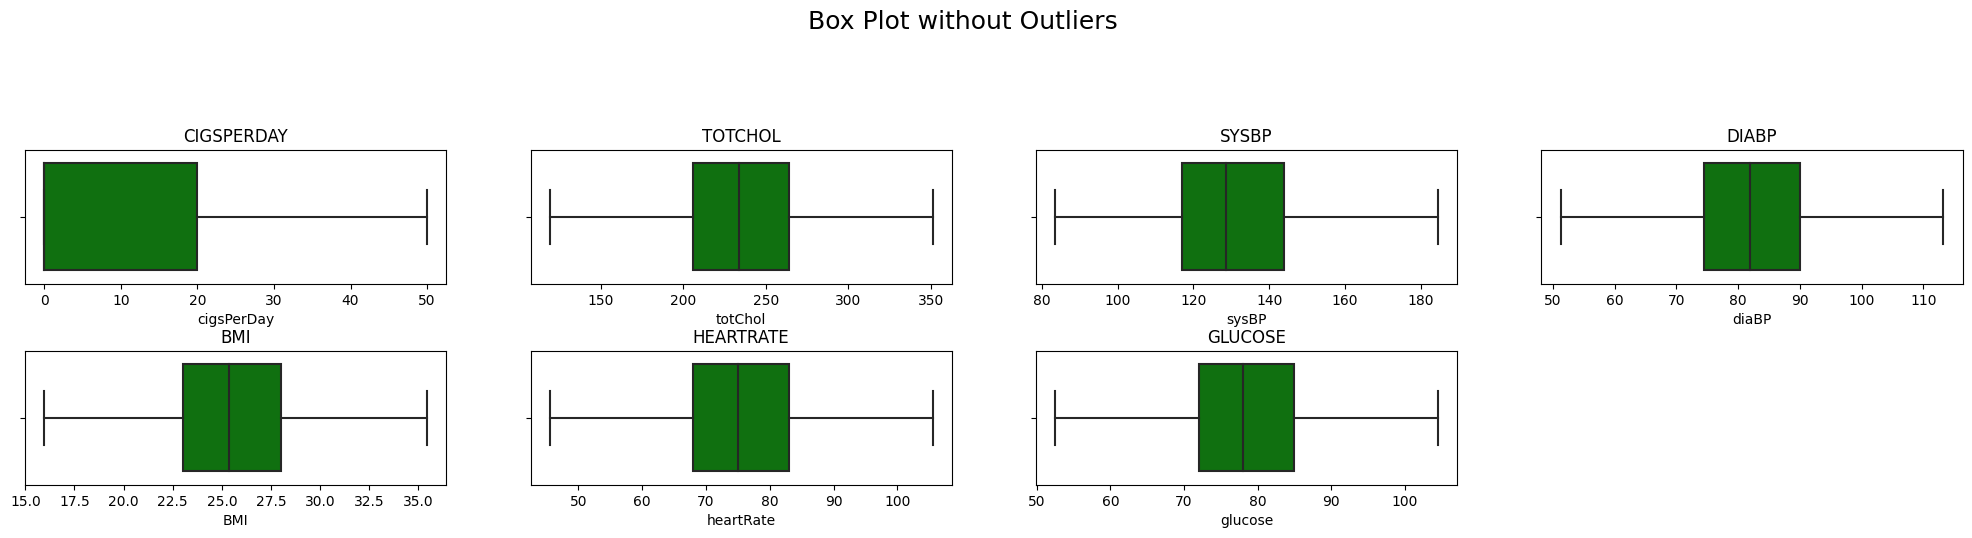

In [223]:
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot without Outliers", fontsize=18, y=0.95)
#plot the all figures in loop with boxplot
for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=data_a[ticker],color='g' ,ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

In [224]:
# Concatenate the two DataFrames vertically
df_new = pd.concat([data_a,data],axis=1)

In [225]:
data_a.head()

cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose
0         3.0    221.0  148.0   85.0  25.38       90.0     80.0
1         0.0    212.0  168.0   98.0  29.77       72.0     75.0
2        10.0    250.0  116.0   71.0  20.35       88.0     94.0
3        20.0    233.0  158.0   88.0  28.26       68.0     94.0
4        30.0    241.0  136.5   85.0  26.42       70.0     77.0

In [226]:
data.head()

age sex is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0   64   F        YES     0.0                0             0         0   
1   36   M         NO     0.0                0             1         0   
2   46   F        YES     0.0                0             0         0   
3   50   M        YES     0.0                0             1         0   
4   64   F        YES     0.0                0             0         0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [227]:
df_new.shape

(3390, 15)

In [228]:
df_new.head()

cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  age sex  \
0         3.0    221.0  148.0   85.0  25.38       90.0     80.0   64   F   
1         0.0    212.0  168.0   98.0  29.77       72.0     75.0   36   M   
2        10.0    250.0  116.0   71.0  20.35       88.0     94.0   46   F   
3        20.0    233.0  158.0   88.0  28.26       68.0     94.0   50   M   
4        30.0    241.0  136.5   85.0  26.42       70.0     77.0   64   F   

  is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes  TenYearCHD  
0        YES     0.0                0             0         0           1  
1         NO     0.0                0             1         0           0  
2        YES     0.0                0             0         0           0  
3        YES     0.0                0             1         0           1  
4        YES     0.0                0             0         0           0

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [229]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'rating' column to perform label encoding
df_new['sex_encoded'] = label_encoder.fit_transform(df_new['sex'])


df_new.drop('sex', axis=1, inplace=True)

In [230]:
df_new.head()

cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  age  \
0         3.0    221.0  148.0   85.0  25.38       90.0     80.0   64   
1         0.0    212.0  168.0   98.0  29.77       72.0     75.0   36   
2        10.0    250.0  116.0   71.0  20.35       88.0     94.0   46   
3        20.0    233.0  158.0   88.0  28.26       68.0     94.0   50   
4        30.0    241.0  136.5   85.0  26.42       70.0     77.0   64   

  is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes  TenYearCHD  \
0        YES     0.0                0             0         0           1   
1         NO     0.0                0             1         0           0   
2        YES     0.0                0             0         0           0   
3        YES     0.0                0             1         0           1   
4        YES     0.0                0             0         0           0   

   sex_encoded  
0            0  
1            1  
2            0  
3            1  
4            0

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [231]:
def blood_presure_classification(SysBP, DiaBP):
  if (SysBP < 90) or (DiaBP < 60):
    return 0 # 'Hypotension'
  if (SysBP < 120) and (DiaBP < 80):
    return 1 # 'Optimal'
  if (SysBP < 130) or (DiaBP < 86):
    return 2 # 'Normal'
  if (SysBP < 140) or (DiaBP < 90):
    return 3 # 'PreHypertensive'
  if (SysBP > 140) and (DiaBP < 90):
    return 4 # 'IsolatedSystolicHypertension'
  if (SysBP < 160) or (DiaBP < 100):
    return 5 # 'GradeI'
  if (SysBP < 180) or (DiaBP < 110):
    return 6 # 'GradeII'
  return 7 # 'GradeIII'

In [232]:
df_new['Hypertension'] = df_new.apply(lambda x: blood_presure_classification(x['sysBP'],x['diaBP']),axis=1)
df_new.head()

cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  age  \
0         3.0    221.0  148.0   85.0  25.38       90.0     80.0   64   
1         0.0    212.0  168.0   98.0  29.77       72.0     75.0   36   
2        10.0    250.0  116.0   71.0  20.35       88.0     94.0   46   
3        20.0    233.0  158.0   88.0  28.26       68.0     94.0   50   
4        30.0    241.0  136.5   85.0  26.42       70.0     77.0   64   

  is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes  TenYearCHD  \
0        YES     0.0                0             0         0           1   
1         NO     0.0                0             1         0           0   
2        YES     0.0                0             0         0           0   
3        YES     0.0                0             1         0           1   
4        YES     0.0                0             0         0           0   

   sex_encoded  Hypertension  
0            0             2  
1            1             5  
2            0             1  
3            1             3  
4            0             2

In [233]:
def diabetes_grade(glucose):
  if glucose < 100:
    return 1 # 'Normal'
  if glucose < 125:
    return 2 # 'Prediabetic'
  if glucose < 200:
    return 3 # 'Mild'
  if glucose < 400:
    return 4 # 'Moderate'
  return 5 # 'Severe'

In [234]:
df_new['Diabetes'] = df_new['glucose'].apply(lambda x: diabetes_grade(x))
df_new.head()

cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  age  \
0         3.0    221.0  148.0   85.0  25.38       90.0     80.0   64   
1         0.0    212.0  168.0   98.0  29.77       72.0     75.0   36   
2        10.0    250.0  116.0   71.0  20.35       88.0     94.0   46   
3        20.0    233.0  158.0   88.0  28.26       68.0     94.0   50   
4        30.0    241.0  136.5   85.0  26.42       70.0     77.0   64   

  is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes  TenYearCHD  \
0        YES     0.0                0             0         0           1   
1         NO     0.0                0             1         0           0   
2        YES     0.0                0             0         0           0   
3        YES     0.0                0             1         0           1   
4        YES     0.0                0             0         0           0   

   sex_encoded  Hypertension  Diabetes  
0            0             2         1  
1            1             5         1  
2            0             1         1  
3            1             3         1  
4            0             2         1

In [235]:
# remove not useful columns
df_new.drop(columns=['sysBP', 'diaBP', 'glucose', 'diabetes', 'is_smoking','prevalentHyp',], inplace=True)

In [236]:
# Manipulate Features to minimize feature correlation and create new features
#examining the skewness in the dataset to check the distribution
skewness = df_new.skew()

#ginding the absolute value
abs(skewness)

# setting up the threshold
skewness_threshold = 0.5

# Separate features into symmetrical and skewed based on skewness threshold
symmetrical_features = skewness[abs(skewness) < skewness_threshold].index
skewed_features = skewness[abs(skewness) >= skewness_threshold].index

# Create new DataFrames for symmetrical and skewed features
print('FEATURES FOLLOWED SYMMETRICAL DISTRIBUTION :')
symmetrical_data = df_new[symmetrical_features]
print(symmetrical_features)

print('FEATURES FOLLOWED SKEWED DISTRIBUTION :')
skewed_data = df_new[skewed_features]
print(skewed_features)

FEATURES FOLLOWED SYMMETRICAL DISTRIBUTION :
Index(['totChol', 'BMI', 'heartRate', 'age', 'sex_encoded'], dtype='object')
FEATURES FOLLOWED SKEWED DISTRIBUTION :
Index(['cigsPerDay', 'BPMeds', 'prevalentStroke', 'TenYearCHD', 'Hypertension',
       'Diabetes'],
      dtype='object')


In [237]:
df_new.shape

(3390, 11)

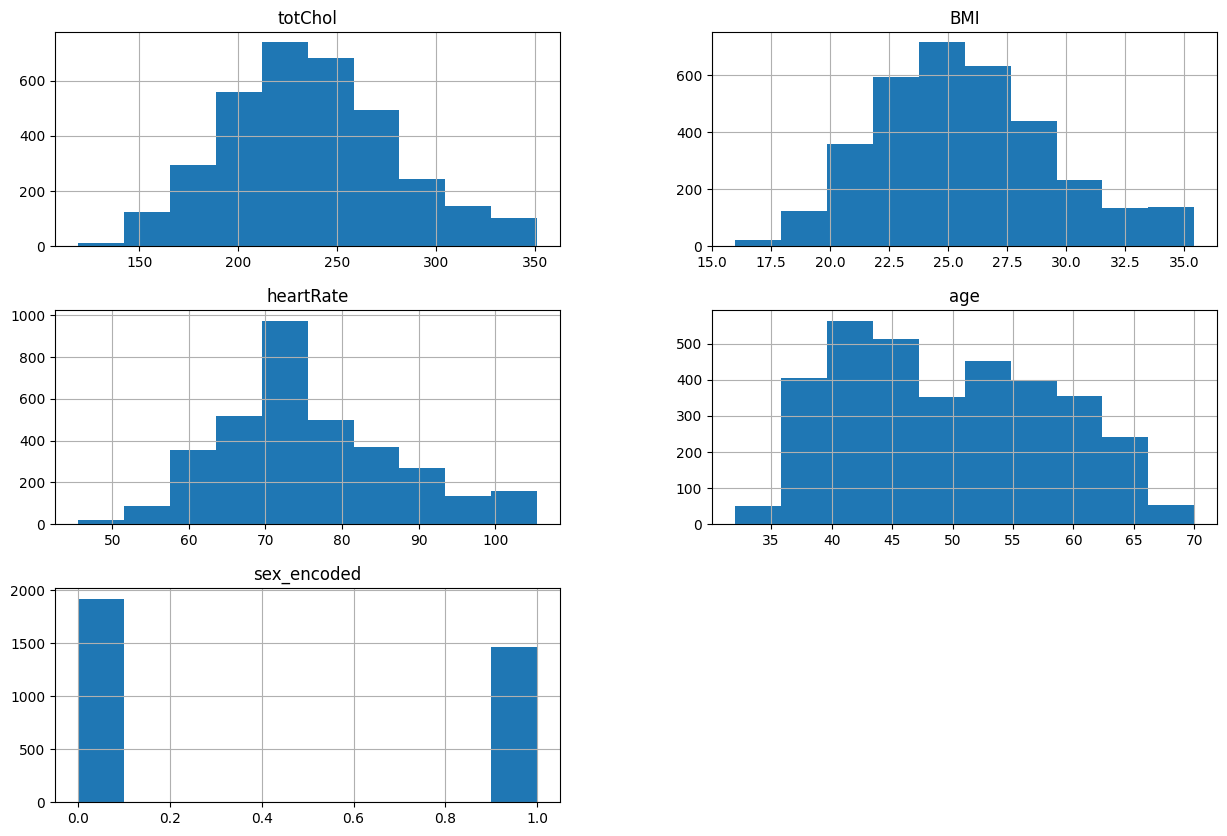

In [238]:
# Visualizing distributions using Histograms:
symmetrical_data.hist(figsize=(15, 10), grid=True);

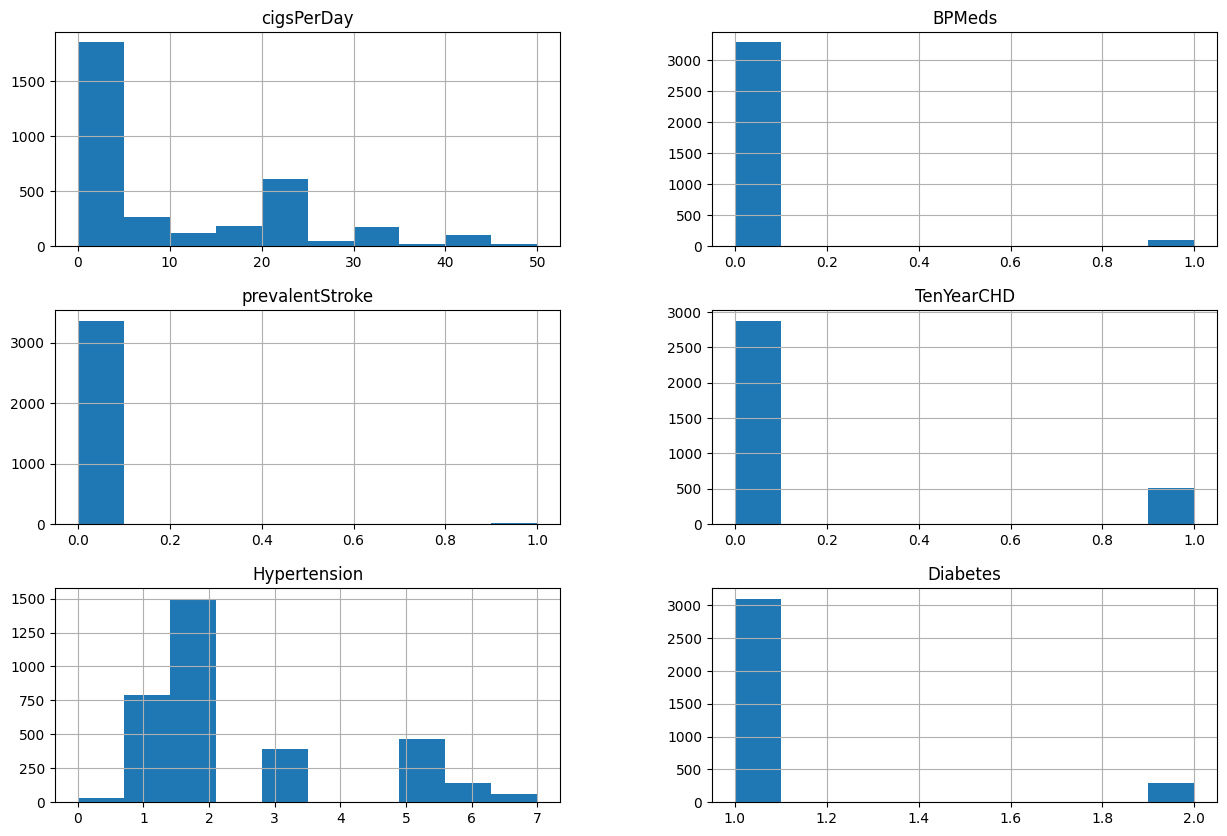

In [239]:
# Visualizing distributions using Histograms:
skewed_data.hist(figsize=(15, 10), grid=True);

#### 2. Feature Selection

In [240]:
# df_new.shape

In [241]:
# # Select your features wisely to avoid
# from sklearn.feature_selection import VarianceThreshold

# sel = VarianceThreshold(threshold=0.15)

# y = sel.fit_transform(df_new)

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [242]:
skewed_data.columns

Index(['cigsPerDay', 'BPMeds', 'prevalentStroke', 'TenYearCHD', 'Hypertension',
       'Diabetes'],
      dtype='object')

In [243]:
# Select the columns you want to transform
columns_to_transform = ['cigsPerDay', 'Hypertension']

# Apply log transformation to the selected columns
skewed_data[columns_to_transform] = skewed_data[columns_to_transform].apply(lambda x: np.log1p(x))

# Display the transformed DataFrame
skewed_data.head()

cigsPerDay  BPMeds  prevalentStroke  TenYearCHD  Hypertension  Diabetes
0    1.386294     0.0                0           1      1.098612         1
1    0.000000     0.0                0           0      1.791759         1
2    2.397895     0.0                0           0      0.693147         1
3    3.044522     0.0                0           1      1.386294         1
4    3.433987     0.0                0           0      1.098612         1

In [244]:
symmetrical_data.head()

totChol    BMI  heartRate  age  sex_encoded
0    221.0  25.38       90.0   64            0
1    212.0  29.77       72.0   36            1
2    250.0  20.35       88.0   46            0
3    233.0  28.26       68.0   50            1
4    241.0  26.42       70.0   64            0

In [245]:
# Concatenate horizontally (along columns)
tranformed_data = pd.concat([symmetrical_data, skewed_data], axis=1)

In [246]:
tranformed_data.head()

totChol    BMI  heartRate  age  sex_encoded  cigsPerDay  BPMeds  \
0    221.0  25.38       90.0   64            0    1.386294     0.0   
1    212.0  29.77       72.0   36            1    0.000000     0.0   
2    250.0  20.35       88.0   46            0    2.397895     0.0   
3    233.0  28.26       68.0   50            1    3.044522     0.0   
4    241.0  26.42       70.0   64            0    3.433987     0.0   

   prevalentStroke  TenYearCHD  Hypertension  Diabetes  
0                0           1      1.098612         1  
1                0           0      1.791759         1  
2                0           0      0.693147         1  
3                0           1      1.386294         1  
4                0           0      1.098612         1

In [247]:
tranformed_data.isna().sum()

totChol            0
BMI                0
heartRate          0
age                0
sex_encoded        0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
TenYearCHD         0
Hypertension       0
Diabetes           0
dtype: int64

In [248]:
tranformed_data.shape

(3390, 11)

### 6. Data Scaling

In [249]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'tranformed_data' is your DataFrame
# Replace 'tranformed_data' with the actual name of your DataFrame

# Extract the 'TenYearCHD' column before scaling
ten_year_chd_column = tranformed_data['TenYearCHD']

# Drop the 'TenYearCHD' column before scaling
features_to_scale = tranformed_data.drop('TenYearCHD', axis=1)


# Scale the remaining features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features_to_scale)

# Create a new DataFrame with the scaled features and 'TenYearCHD' column
df_scaled = pd.DataFrame(scaled_features, columns=features_to_scale.columns)

# Add the 'TenYearCHD' column back to the DataFrame
df_scaled['TenYearCHD'] = ten_year_chd_column

# Display the DataFrame with scaled features
df_scaled.head()

totChol       BMI  heartRate       age  sex_encoded  cigsPerDay  BPMeds  \
0  0.439655  0.483356   0.741667  0.842105          0.0    0.352583     0.0   
1  0.400862  0.708614   0.441667  0.105263          1.0    0.000000     0.0   
2  0.564655  0.225258   0.708333  0.368421          0.0    0.609868     0.0   
3  0.491379  0.631133   0.375000  0.473684          1.0    0.774328     0.0   
4  0.525862  0.536720   0.408333  0.842105          0.0    0.873382     0.0   

   prevalentStroke  Hypertension  Diabetes  TenYearCHD  
0              0.0      0.528321       0.0           1  
1              0.0      0.861654       0.0           0  
2              0.0      0.333333       0.0           0  
3              0.0      0.666667       0.0           1  
4              0.0      0.528321       0.0           0

In [250]:
df_scaled.shape

(3390, 11)

In [251]:
# Drop all rows with NaN values in place
df_scaled.dropna(inplace=True)

In [252]:
df_scaled.isna().sum()

totChol            0
BMI                0
heartRate          0
age                0
sex_encoded        0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
Hypertension       0
Diabetes           0
TenYearCHD         0
dtype: int64

In [253]:
df_scaled.shape

(3390, 11)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [254]:
y = df_scaled['TenYearCHD']
X = df_scaled.drop('TenYearCHD', axis=1)

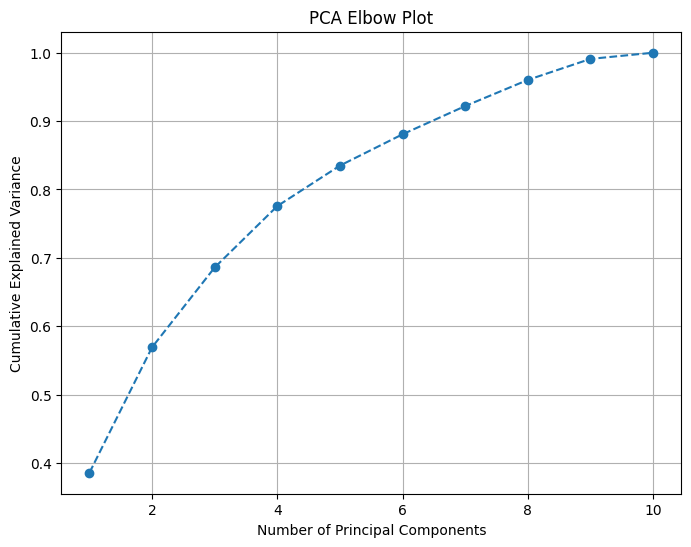

In [255]:
# DImensionality Reduction (If needed)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Initialize a PCA instance without specifying the number of components
pca = PCA()

# Fit the PCA model to your standardized data
pca.fit(X)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Create an elbow plot to visualize the explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Elbow Plot')
plt.grid()
plt.show()

In [256]:
# Create a PCA instance and specify the number of components you want to retain
# For example, if you want to retain 7 components, set n_components=7
n_components = 8
pca = PCA(n_components=n_components)

# Fit the PCA model to your standardized data and transform it
transformed_data_pca = pca.fit_transform(X)

# The variable 'transformed_data_pca' now contains your data in the reduced-dimensional space with 'n_components' principal components.

# You can also access explained variance to see how much variance is explained by each component
explained_variance = pca.explained_variance_ratio_

In [257]:
# the variances of the pca that we extract and there importance in predicting the output
explained_variance

array([0.38578206, 0.18347568, 0.11676407, 0.08971993, 0.05918692,
       0.04581507, 0.04125824, 0.0382404 ])

In [258]:
#calculating the total of  explained_variance  which needs to be more than 90%
explained_variance.sum()

0.9602423763687459

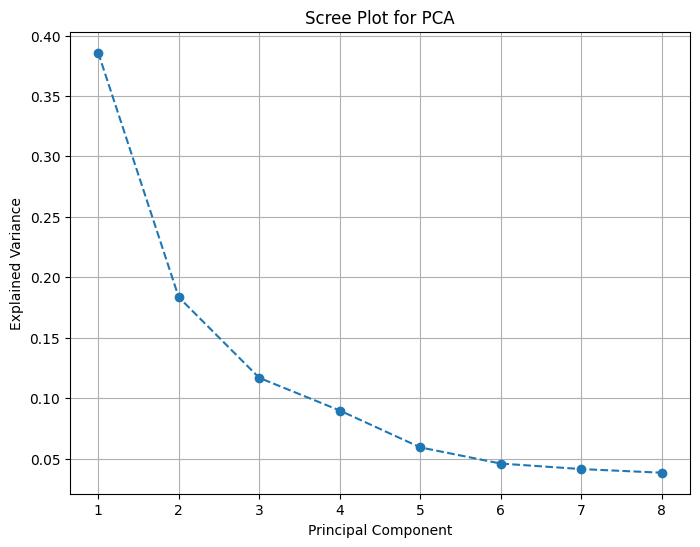

In [259]:
# Create a scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot for PCA')
plt.grid()
plt.show()

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [260]:
# Split your data to train and test. Choose Splitting ratio wisely.
x = transformed_data_pca
y = df_scaled['TenYearCHD']

In [261]:
#splitting the data into 80/20 ration
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=3)

In [262]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(2712, 8) (678, 8) (2712,) (678,)


##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [263]:
# Install the imbalanced-learn library
!pip install -U imbalanced-learn

In [264]:
#importing the SMOTETomek liabrary
from imblearn.combine import SMOTETomek

# Apply SMOTETomek to oversample the minority class and clean the majority class
smote_tomek = SMOTETomek(random_state=24)
x_resampled, y_resampled = smote_tomek.fit_resample(x_train, y_train)

# Now, x_train_resampled and y_train_resampled contain the oversampled and cleaned data
# You can also check the class distribution to verify the oversampling and cleaning
print("Class distribution before SMOTETomek:\n", y_train.value_counts())
print("\nClass distribution after SMOTETomek:\n", pd.Series(y_resampled).value_counts())

Class distribution before SMOTETomek:
 0    2314
1     398
Name: TenYearCHD, dtype: int64

Class distribution after SMOTETomek:
 0    2259
1    2259
Name: TenYearCHD, dtype: int64


In [265]:
from sklearn.preprocessing import PolynomialFeatures

# Assuming you already have x_resampled and y_resampled from SMOTETomek

# Create polynomial features
poly = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
x_resampled_poly = poly.fit_transform(x_resampled)

# Transform the test data using the same polynomial features
x_test_poly = poly.transform(x_test)

# Now we use x_resampled_poly contains the polynomial features of the oversampled and cleaned data

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### Model 1 - Logistic Regression


Confusion Matrix (Logistic Regression):
 [[362 203]
 [ 35  78]]

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.91      0.64      0.75       565
           1       0.28      0.69      0.40       113

    accuracy                           0.65       678
   macro avg       0.59      0.67      0.57       678
weighted avg       0.81      0.65      0.69       678



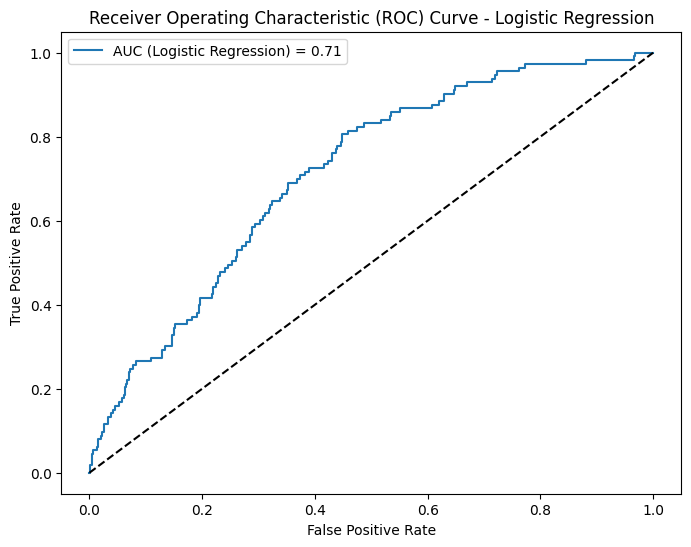

AUC-ROC Score (Logistic Regression): 0.7120056386561202


In [266]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming you have x_resampled_poly, x_test_poly, y_resampled, y_test from the previous steps

# Create a Logistic Regression model
logreg_model = LogisticRegression()

# Fit the model to the polynomial features of the resampled training data
logreg_model.fit(x_resampled_poly, y_resampled)

# Make predictions on the test data
y_pred_logreg = logreg_model.predict(x_test_poly)

# Evaluate the Logistic Regression model
print("\nConfusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, y_pred_logreg))
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_logreg))

# Predict probabilities for the positive class
y_prob_logreg = logreg_model.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for Logistic Regression
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_prob_logreg)

# Plot the ROC curve for Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'AUC (Logistic Regression) = {roc_auc_logreg:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend()
plt.show()

# Print AUC score for Logistic Regression
print("AUC-ROC Score (Logistic Regression):", roc_auc_logreg)


Best Hyperparameters: {'C': 10, 'penalty': 'l2'}

Confusion Matrix (Logistic Regression - Tuned):
 [[360 205]
 [ 38  75]]

Classification Report (Logistic Regression - Tuned):
               precision    recall  f1-score   support

           0       0.90      0.64      0.75       565
           1       0.27      0.66      0.38       113

    accuracy                           0.64       678
   macro avg       0.59      0.65      0.56       678
weighted avg       0.80      0.64      0.69       678



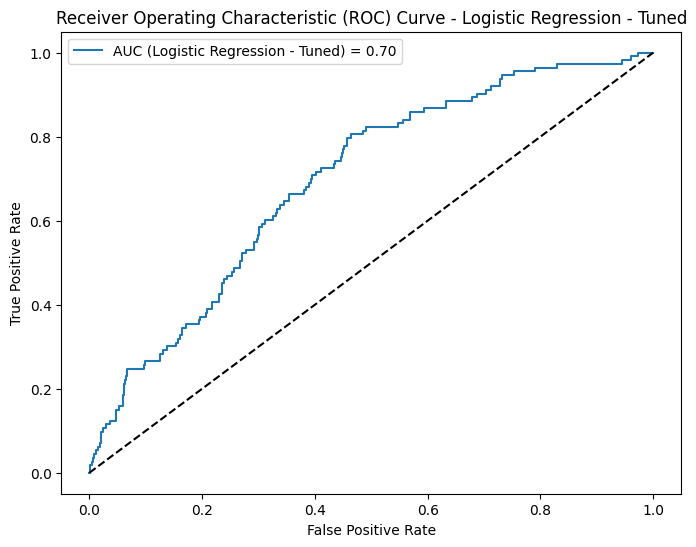

AUC-ROC Score (Logistic Regression - Tuned): 0.6958101652439501


In [267]:
from sklearn.model_selection import GridSearchCV

# Define the logistic regression model
logreg_model = LogisticRegression()

# Define hyperparameter grid for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Create GridSearchCV instance
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='roc_auc')

# Fit the model to the polynomial features of the resampled training data
grid_search.fit(x_resampled_poly, y_resampled)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test data
y_pred_logreg_tuned = grid_search.predict(x_test_poly)

# Evaluate the Logistic Regression model with tuned hyperparameters
print("\nConfusion Matrix (Logistic Regression - Tuned):\n", confusion_matrix(y_test, y_pred_logreg_tuned))
print("\nClassification Report (Logistic Regression - Tuned):\n", classification_report(y_test, y_pred_logreg_tuned))

# Predict probabilities for the positive class
y_prob_logreg_tuned = grid_search.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for Logistic Regression with tuned hyperparameters
fpr_logreg_tuned, tpr_logreg_tuned, thresholds_logreg_tuned = roc_curve(y_test, y_prob_logreg_tuned)
roc_auc_logreg_tuned = roc_auc_score(y_test, y_prob_logreg_tuned)

# Plot the ROC curve for Logistic Regression with tuned hyperparameters
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg_tuned, tpr_logreg_tuned, label=f'AUC (Logistic Regression - Tuned) = {roc_auc_logreg_tuned:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression - Tuned')
plt.legend()
plt.show()

# Print AUC score for Logistic Regression with tuned hyperparameters
print("AUC-ROC Score (Logistic Regression - Tuned):", roc_auc_logreg_tuned)

### Model 2 - Decision Tree


Confusion Matrix (Decision Tree):
 [[443 122]
 [ 84  29]]

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       565
           1       0.19      0.26      0.22       113

    accuracy                           0.70       678
   macro avg       0.52      0.52      0.52       678
weighted avg       0.73      0.70      0.71       678



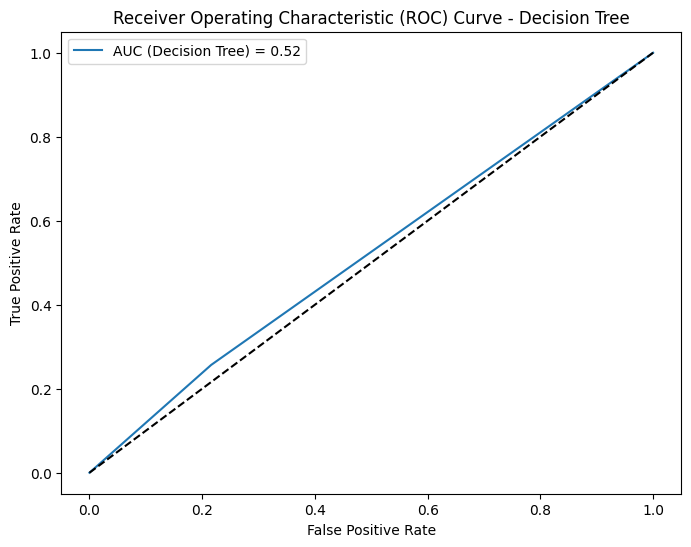

AUC-ROC Score (Decision Tree): 0.5203539823008849


In [268]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model to the polynomial features of the resampled training data
dt_classifier.fit(x_resampled_poly, y_resampled)

# Make predictions on the test data
y_pred_dt = dt_classifier.predict(x_test_poly)

# Evaluate the Decision Tree model
print("\nConfusion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))

# Predict probabilities for the positive class
y_prob_dt = dt_classifier.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for Decision Tree
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

# Plot the ROC curve for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {roc_auc_dt:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend()
plt.show()

# Print AUC score for Decision Tree
print("AUC-ROC Score (Decision Tree):", roc_auc_dt)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}

Confusion Matrix (Tuned Decision Tree):
 [[450 115]
 [ 81  32]]

Classification Report (Tuned Decision Tree):
               precision    recall  f1-score   support

           0       0.85      0.80      0.82       565
           1       0.22      0.28      0.25       113

    accuracy                           0.71       678
   macro avg       0.53      0.54      0.53       678
weighted avg       0.74      0.71      0.73       678



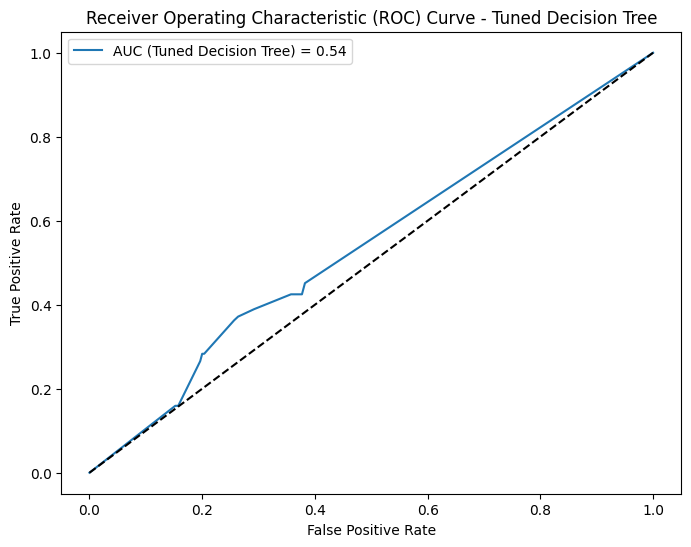

AUC-ROC Score (Tuned Decision Tree): 0.5392356488370271


In [269]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the model to the polynomial features of the resampled training data
grid_search.fit(x_resampled_poly, y_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_dt_classifier = grid_search.best_estimator_

# Make predictions on the test data
y_pred_dt_tuned = best_dt_classifier.predict(x_test_poly)

# Evaluate the tuned Decision Tree model
print("\nConfusion Matrix (Tuned Decision Tree):\n", confusion_matrix(y_test, y_pred_dt_tuned))
print("\nClassification Report (Tuned Decision Tree):\n", classification_report(y_test, y_pred_dt_tuned))

# Predict probabilities for the positive class
y_prob_dt_tuned = best_dt_classifier.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for tuned Decision Tree
fpr_dt_tuned, tpr_dt_tuned, thresholds_dt_tuned = roc_curve(y_test, y_prob_dt_tuned)
roc_auc_dt_tuned = roc_auc_score(y_test, y_prob_dt_tuned)

# Plot the ROC curve for tuned Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt_tuned, tpr_dt_tuned, label=f'AUC (Tuned Decision Tree) = {roc_auc_dt_tuned:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Tuned Decision Tree')
plt.legend()
plt.show()

# Print AUC score for tuned Decision Tree
print("AUC-ROC Score (Tuned Decision Tree):", roc_auc_dt_tuned)

### Model 3 - Random foresst Classifier


Confusion Matrix (Random Forest):
 [[479   0]
 [  0 425]]

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       479
           1       1.00      1.00      1.00       425

    accuracy                           1.00       904
   macro avg       1.00      1.00      1.00       904
weighted avg       1.00      1.00      1.00       904



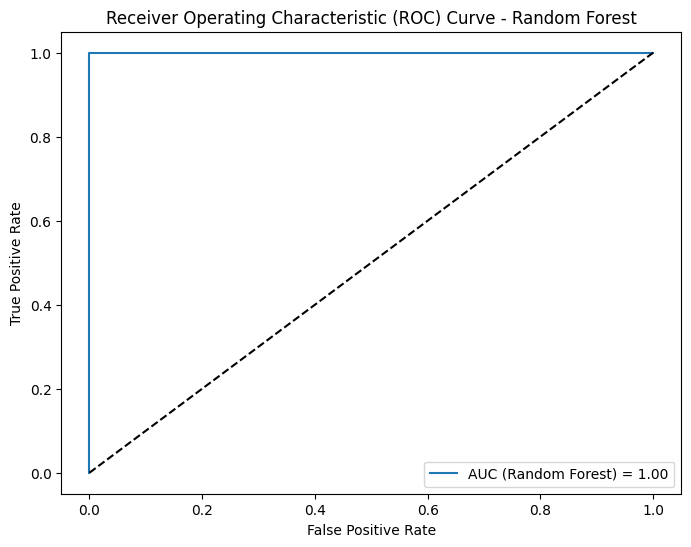

AUC-ROC Score (Random Forest): 1.0


In [145]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model to the polynomial features of the resampled training data
rf_classifier.fit(x_resampled_poly, y_resampled)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(x_test_poly)

# Evaluate the Random Forest model
print("\nConfusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# Predict probabilities for the positive class
y_prob_rf = rf_classifier.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plot the ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forest) = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend()
plt.show()

# Print AUC score for Random Forest
print("AUC-ROC Score (Random Forest):", roc_auc_rf)

Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}

Confusion Matrix (Random Forest - Tuned):
 [[478   1]
 [  0 425]]

Classification Report (Random Forest - Tuned):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       479
           1       1.00      1.00      1.00       425

    accuracy                           1.00       904
   macro avg       1.00      1.00      1.00       904
weighted avg       1.00      1.00      1.00       904



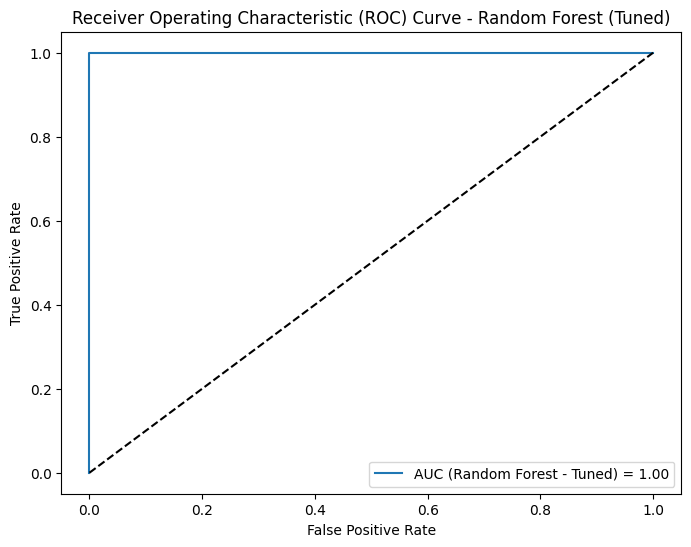

AUC-ROC Score (Random Forest - Tuned): 1.0


In [148]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100,150],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2,3]
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='roc_auc')

# Fit the model to the polynomial features of the resampled training data
grid_search.fit(x_resampled_poly, y_resampled)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Make predictions on the test data using the best estimator
y_pred_rf_tuned = best_estimator.predict(x_test_poly)

# Evaluate the Random Forest model with hyperparameter tuning
print("\nConfusion Matrix (Random Forest - Tuned):\n", confusion_matrix(y_test, y_pred_rf_tuned))
print("\nClassification Report (Random Forest - Tuned):\n", classification_report(y_test, y_pred_rf_tuned))

# Predict probabilities for the positive class
y_prob_rf_tuned = best_estimator.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for Random Forest with hyperparameter tuning
fpr_rf_tuned, tpr_rf_tuned, thresholds_rf_tuned = roc_curve(y_test, y_prob_rf_tuned)
roc_auc_rf_tuned = roc_auc_score(y_test, y_prob_rf_tuned)

# Plot the ROC curve for Random Forest with hyperparameter tuning
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_tuned, tpr_rf_tuned, label=f'AUC (Random Forest - Tuned) = {roc_auc_rf_tuned:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest (Tuned)')
plt.legend()
plt.show()

# Print AUC score for Random Forest with hyperparameter tuning
print("AUC-ROC Score (Random Forest - Tuned):", roc_auc_rf_tuned)

### Model 4 - AdaBoost with polynomial Feature


Confusion Matrix (AdaBoost):
 [[336 143]
 [ 97 328]]

Classification Report (AdaBoost):
               precision    recall  f1-score   support

           0       0.78      0.70      0.74       479
           1       0.70      0.77      0.73       425

    accuracy                           0.73       904
   macro avg       0.74      0.74      0.73       904
weighted avg       0.74      0.73      0.73       904



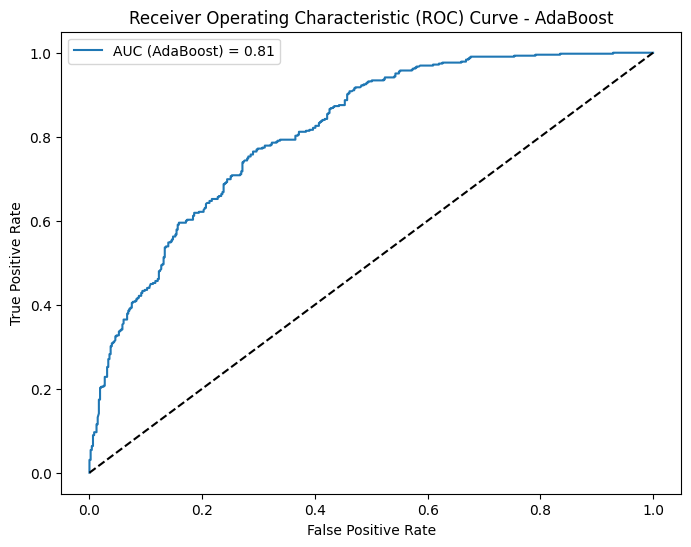

AUC-ROC Score (AdaBoost): 0.8135134471325064


In [149]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create an AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Fit the model to the polynomial features of the resampled training data
adaboost_classifier.fit(x_resampled_poly, y_resampled)

# Make predictions on the test data
y_pred_adaboost = adaboost_classifier.predict(x_test_poly)

# Evaluate the AdaBoost model
print("\nConfusion Matrix (AdaBoost):\n", confusion_matrix(y_test, y_pred_adaboost))
print("\nClassification Report (AdaBoost):\n", classification_report(y_test, y_pred_adaboost))

# Predict probabilities for the positive class
y_prob_adaboost = adaboost_classifier.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for AdaBoost
fpr_adaboost, tpr_adaboost, thresholds_adaboost = roc_curve(y_test, y_prob_adaboost)
roc_auc_adaboost = roc_auc_score(y_test, y_prob_adaboost)

# Plot the ROC curve for AdaBoost
plt.figure(figsize=(8, 6))
plt.plot(fpr_adaboost, tpr_adaboost, label=f'AUC (AdaBoost) = {roc_auc_adaboost:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - AdaBoost')
plt.legend()
plt.show()

# Print AUC score for AdaBoost
print("AUC-ROC Score (AdaBoost):", roc_auc_adaboost)

Best Parameters: {'learning_rate': 1.0, 'n_estimators': 200}
Best AUC Score: 0.7875447303084191

Confusion Matrix (Best AdaBoost):
 [[371 108]
 [ 82 343]]

Classification Report (Best AdaBoost):
               precision    recall  f1-score   support

           0       0.82      0.77      0.80       479
           1       0.76      0.81      0.78       425

    accuracy                           0.79       904
   macro avg       0.79      0.79      0.79       904
weighted avg       0.79      0.79      0.79       904



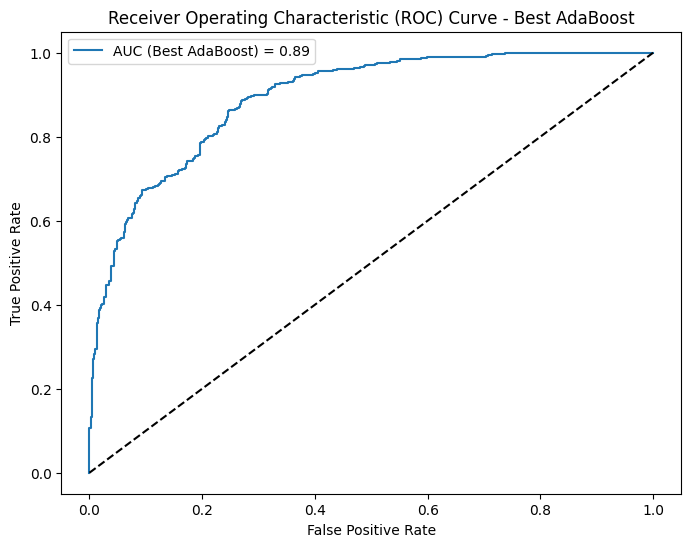

AUC-ROC Score (Best AdaBoost): 0.8925457448114945


In [150]:
from sklearn.model_selection import GridSearchCV

# Define the AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=5, scoring='roc_auc')

# Fit the GridSearchCV object to the data
grid_search.fit(x_resampled_poly, y_resampled)

# Print the best parameters and the corresponding AUC score
print("Best Parameters:", grid_search.best_params_)
print("Best AUC Score:", grid_search.best_score_)

# Get the best model from the grid search
best_adaboost_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred_best_adaboost = best_adaboost_model.predict(x_test_poly)

# Evaluate the best AdaBoost model
print("\nConfusion Matrix (Best AdaBoost):\n", confusion_matrix(y_test, y_pred_best_adaboost))
print("\nClassification Report (Best AdaBoost):\n", classification_report(y_test, y_pred_best_adaboost))

# Predict probabilities for the positive class
y_prob_best_adaboost = best_adaboost_model.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for the best AdaBoost model
fpr_best_adaboost, tpr_best_adaboost, thresholds_best_adaboost = roc_curve(y_test, y_prob_best_adaboost)
roc_auc_best_adaboost = roc_auc_score(y_test, y_prob_best_adaboost)

# Plot the ROC curve for the best AdaBoost model
plt.figure(figsize=(8, 6))
plt.plot(fpr_best_adaboost, tpr_best_adaboost, label=f'AUC (Best AdaBoost) = {roc_auc_best_adaboost:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Best AdaBoost')
plt.legend()
plt.show()

# Print AUC score for the best AdaBoost model
print("AUC-ROC Score (Best AdaBoost):", roc_auc_best_adaboost)

### Gradient Boosting classifier with polynomial features


Confusion Matrix (Gradient Boosting):
 [[373 106]
 [ 67 358]]

Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.85      0.78      0.81       479
           1       0.77      0.84      0.81       425

    accuracy                           0.81       904
   macro avg       0.81      0.81      0.81       904
weighted avg       0.81      0.81      0.81       904



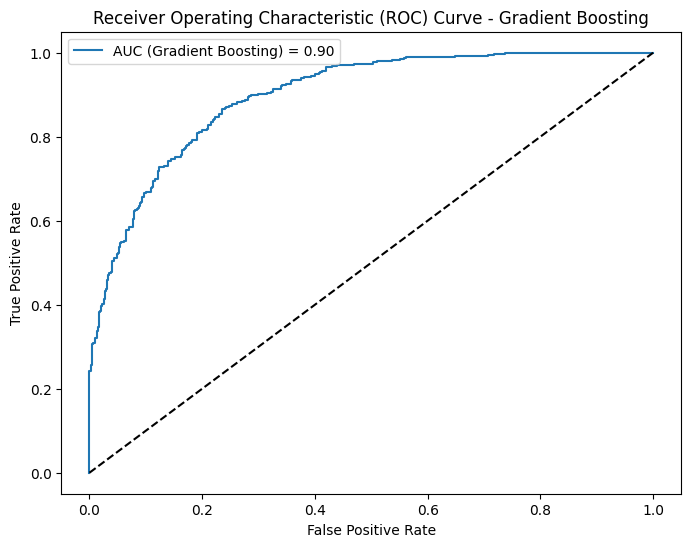

AUC-ROC Score (Gradient Boosting): 0.8977870563674324


In [152]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)

# Fit the model to the polynomial features of the resampled training data
gb_classifier.fit(x_resampled_poly, y_resampled)

# Make predictions on the test data
y_pred_gb = gb_classifier.predict(x_test_poly)

# Evaluate the Gradient Boosting model
print("\nConfusion Matrix (Gradient Boosting):\n", confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report (Gradient Boosting):\n", classification_report(y_test, y_pred_gb))

# Predict probabilities for the positive class
y_prob_gb = gb_classifier.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for Gradient Boosting
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_prob_gb)
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)

# Plot the ROC curve for Gradient Boosting
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label=f'AUC (Gradient Boosting) = {roc_auc_gb:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting')
plt.legend()
plt.show()

# Print AUC score for Gradient Boosting
print("AUC-ROC Score (Gradient Boosting):", roc_auc_gb)

Best Parameters: {'learning_rate': 1.0, 'n_estimators': 100}
Best AUC Score: 0.8625355845530134

Confusion Matrix (Best Gradient Boosting):
 [[467  12]
 [  7 418]]

Classification Report (Best Gradient Boosting):
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       479
           1       0.97      0.98      0.98       425

    accuracy                           0.98       904
   macro avg       0.98      0.98      0.98       904
weighted avg       0.98      0.98      0.98       904



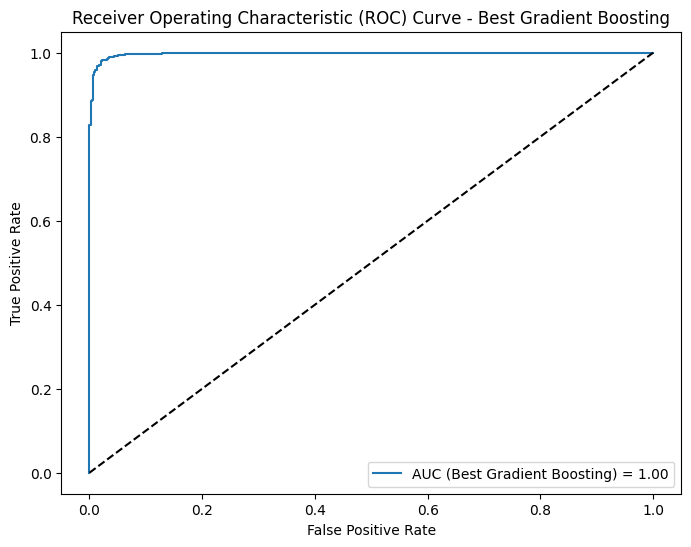

AUC-ROC Score (Best Gradient Boosting): 0.9980547709689305


In [153]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Create the GridSearchCV object
grid_search_gb = GridSearchCV(gb_classifier, param_grid, cv=5, scoring='roc_auc')

# Fit the GridSearchCV object to the data
grid_search_gb.fit(x_resampled_poly, y_resampled)

# Print the best parameters and the corresponding AUC score
print("Best Parameters:", grid_search_gb.best_params_)
print("Best AUC Score:", grid_search_gb.best_score_)

# Get the best model from the grid search
best_gb_model = grid_search_gb.best_estimator_

# Make predictions on the test data
y_pred_best_gb = best_gb_model.predict(x_test_poly)

# Evaluate the best Gradient Boosting model
print("\nConfusion Matrix (Best Gradient Boosting):\n", confusion_matrix(y_test, y_pred_best_gb))
print("\nClassification Report (Best Gradient Boosting):\n", classification_report(y_test, y_pred_best_gb))

# Predict probabilities for the positive class
y_prob_best_gb = best_gb_model.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for the best Gradient Boosting model
fpr_best_gb, tpr_best_gb, thresholds_best_gb = roc_curve(y_test, y_prob_best_gb)
roc_auc_best_gb = roc_auc_score(y_test, y_prob_best_gb)

# Plot the ROC curve for the best Gradient Boosting model
plt.figure(figsize=(8, 6))
plt.plot(fpr_best_gb, tpr_best_gb, label=f'AUC (Best Gradient Boosting) = {roc_auc_best_gb:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Best Gradient Boosting')
plt.legend()
plt.show()

# Print AUC score for the best Gradient Boosting model
print("AUC-ROC Score (Best Gradient Boosting):", roc_auc_best_gb)


### XGB BOOST MODEL WITH POLYNOMIAL FEATURES


Confusion Matrix (XGBoost):
 [[372 107]
 [ 71 354]]

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       479
           1       0.77      0.83      0.80       425

    accuracy                           0.80       904
   macro avg       0.80      0.80      0.80       904
weighted avg       0.81      0.80      0.80       904



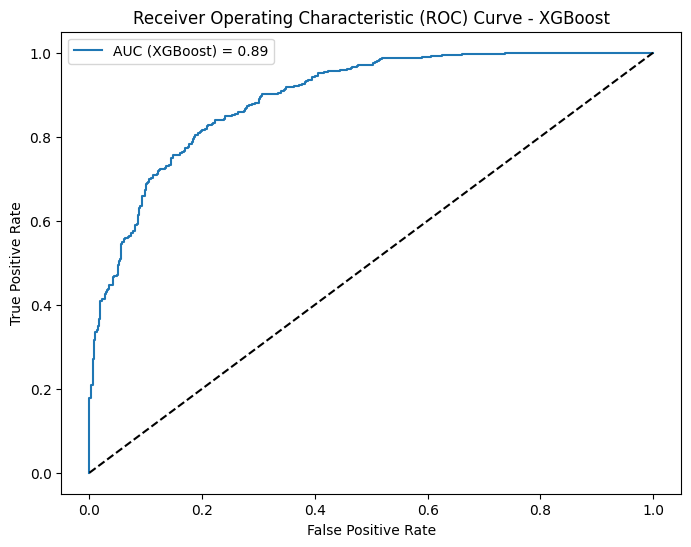

AUC-ROC Score (XGBoost): 0.8935723934667813


In [154]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create an XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)

# Fit the model to the polynomial features of the resampled training data
xgb_classifier.fit(x_resampled_poly, y_resampled)

# Make predictions on the test data
y_pred_xgb = xgb_classifier.predict(x_test_poly)

# Evaluate the XGBoost model
print("\nConfusion Matrix (XGBoost):\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))

# Predict probabilities for the positive class
y_prob_xgb = xgb_classifier.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# Plot the ROC curve for XGBoost
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'AUC (XGBoost) = {roc_auc_xgb:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.legend()
plt.show()

# Print AUC score for XGBoost
print("AUC-ROC Score (XGBoost):", roc_auc_xgb)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}

Confusion Matrix (Tuned XGBoost):
 [[479   0]
 [  0 425]]

Classification Report (Tuned XGBoost):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       479
           1       1.00      1.00      1.00       425

    accuracy                           1.00       904
   macro avg       1.00      1.00      1.00       904
weighted avg       1.00      1.00      1.00       904



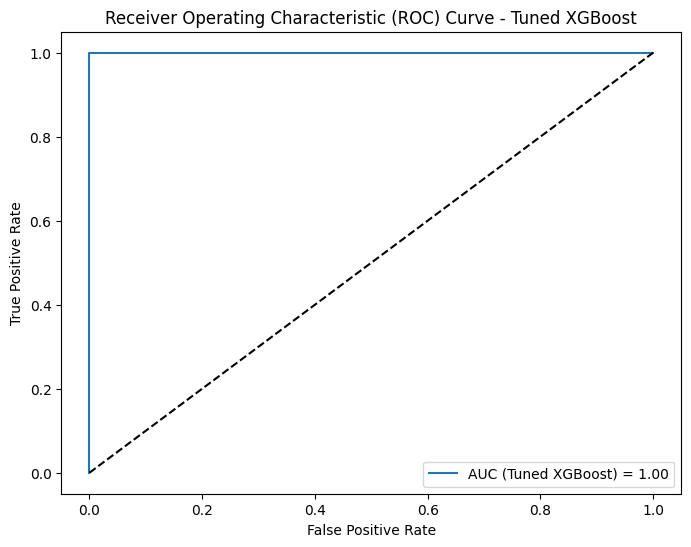

AUC-ROC Score (Tuned XGBoost): 1.0


In [156]:
from sklearn.model_selection import GridSearchCV

# Define the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100,150,200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5,7]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1)

# Fit the model to the resampled training data
grid_search.fit(x_resampled_poly, y_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test data using the best model
y_pred_xgb_tuned = grid_search.predict(x_test_poly)

# Evaluate the tuned XGBoost model
print("\nConfusion Matrix (Tuned XGBoost):\n", confusion_matrix(y_test, y_pred_xgb_tuned))
print("\nClassification Report (Tuned XGBoost):\n", classification_report(y_test, y_pred_xgb_tuned))

# Predict probabilities for the positive class using the best model
y_prob_xgb_tuned = grid_search.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for Tuned XGBoost
fpr_xgb_tuned, tpr_xgb_tuned, thresholds_xgb_tuned = roc_curve(y_test, y_prob_xgb_tuned)
roc_auc_xgb_tuned = roc_auc_score(y_test, y_prob_xgb_tuned)

# Plot the ROC curve for Tuned XGBoost
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb_tuned, tpr_xgb_tuned, label=f'AUC (Tuned XGBoost) = {roc_auc_xgb_tuned:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Tuned XGBoost')
plt.legend()
plt.show()

# Print AUC score for Tuned XGBoost
print("AUC-ROC Score (Tuned XGBoost):", roc_auc_xgb_tuned)


### ML Model - 7 KNN with Polynomial Feature


Confusion Matrix (KNN):
 [[376 103]
 [  6 419]]

Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.98      0.78      0.87       479
           1       0.80      0.99      0.88       425

    accuracy                           0.88       904
   macro avg       0.89      0.89      0.88       904
weighted avg       0.90      0.88      0.88       904



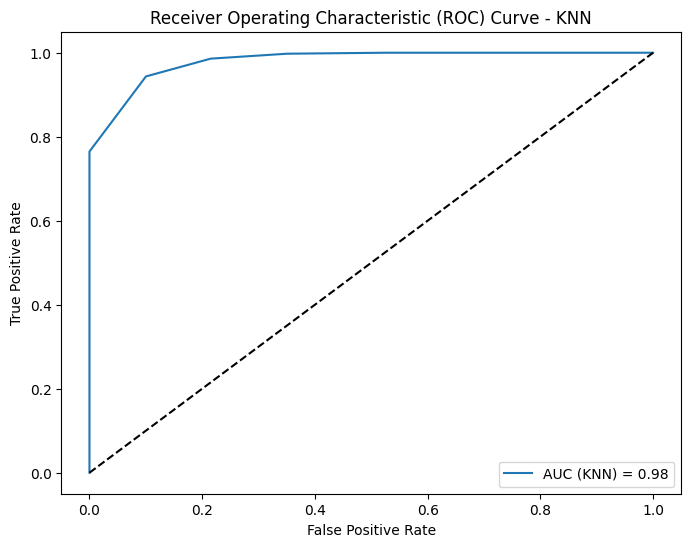

AUC-ROC Score (KNN): 0.9800049121945228


In [157]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create a K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()

# Fit the model to the polynomial features of the resampled training data
knn_classifier.fit(x_resampled_poly, y_resampled)

# Make predictions on the test data
y_pred_knn = knn_classifier.predict(x_test_poly)

# Evaluate the KNN model
print("\nConfusion Matrix (KNN):\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report (KNN):\n", classification_report(y_test, y_pred_knn))

# Predict probabilities for the positive class
y_prob_knn = knn_classifier.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)

# Plot the ROC curve for KNN
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'AUC (KNN) = {roc_auc_knn:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend()
plt.show()

# Print AUC score for KNN
print("AUC-ROC Score (KNN):", roc_auc_knn)

Best Hyperparameters: {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}

Confusion Matrix (Tuned KNN):
 [[479   0]
 [  0 425]]

Classification Report (Tuned KNN):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       479
           1       1.00      1.00      1.00       425

    accuracy                           1.00       904
   macro avg       1.00      1.00      1.00       904
weighted avg       1.00      1.00      1.00       904



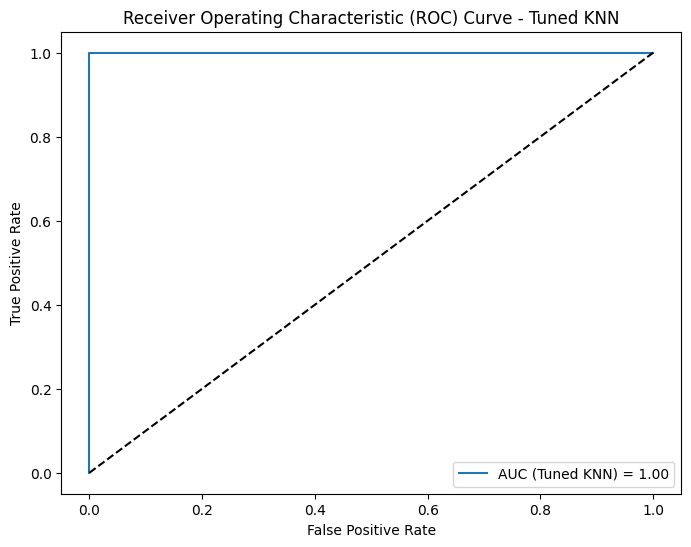

AUC-ROC Score (Tuned KNN): 1.0


In [158]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Adjust these values based on your needs
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create a K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()

# Create a GridSearchCV instance
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='roc_auc')

# Fit the GridSearchCV to the polynomial features of the resampled training data
grid_search.fit(x_resampled_poly, y_resampled)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best KNN model from the grid search
best_knn_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred_knn_tuned = best_knn_model.predict(x_test_poly)

# Evaluate the tuned KNN model
print("\nConfusion Matrix (Tuned KNN):\n", confusion_matrix(y_test, y_pred_knn_tuned))
print("\nClassification Report (Tuned KNN):\n", classification_report(y_test, y_pred_knn_tuned))

# Predict probabilities for the positive class
y_prob_knn_tuned = best_knn_model.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for tuned KNN
fpr_knn_tuned, tpr_knn_tuned, thresholds_knn_tuned = roc_curve(y_test, y_prob_knn_tuned)
roc_auc_knn_tuned = roc_auc_score(y_test, y_prob_knn_tuned)

# Plot the ROC curve for tuned KNN
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn_tuned, tpr_knn_tuned, label=f'AUC (Tuned KNN) = {roc_auc_knn_tuned:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Tuned KNN')
plt.legend()
plt.show()

# Print AUC score for tuned KNN
print("AUC-ROC Score (Tuned KNN):", roc_auc_knn_tuned)

### ML Model 7 - Naive Bayes Classifier


Confusion Matrix (Naive Bayes):
 [[416  63]
 [313 112]]

Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.57      0.87      0.69       479
           1       0.64      0.26      0.37       425

    accuracy                           0.58       904
   macro avg       0.61      0.57      0.53       904
weighted avg       0.60      0.58      0.54       904



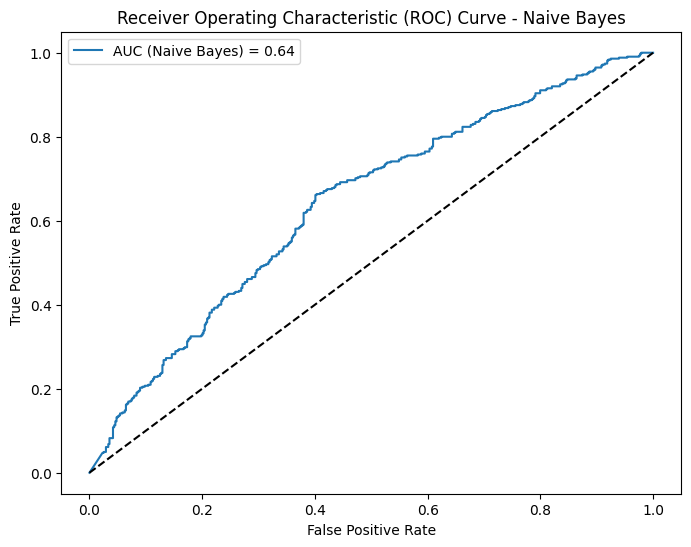

AUC-ROC Score (Naive Bayes): 0.6398084244136069


In [159]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create a Gaussian Naive Bayes Classifier
nb_classifier = GaussianNB()

# Fit the model to the polynomial features of the resampled training data
nb_classifier.fit(x_resampled_poly, y_resampled)

# Make predictions on the test data
y_pred_nb = nb_classifier.predict(x_test_poly)

# Evaluate the Naive Bayes model
print("\nConfusion Matrix (Naive Bayes):\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report (Naive Bayes):\n", classification_report(y_test, y_pred_nb))

# Predict probabilities for the positive class
y_prob_nb = nb_classifier.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for Naive Bayes
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_prob_nb)
roc_auc_nb = roc_auc_score(y_test, y_prob_nb)

# Plot the ROC curve for Naive Bayes
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'AUC (Naive Bayes) = {roc_auc_nb:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend()
plt.show()

# Print AUC score for Naive Bayes
print("AUC-ROC Score (Naive Bayes):", roc_auc_nb)

Best Parameters: {'var_smoothing': 0.1}

Confusion Matrix (Naive Bayes - CV):
 [[431  48]
 [333  92]]

Classification Report (Naive Bayes - CV):
               precision    recall  f1-score   support

           0       0.56      0.90      0.69       479
           1       0.66      0.22      0.33       425

    accuracy                           0.58       904
   macro avg       0.61      0.56      0.51       904
weighted avg       0.61      0.58      0.52       904



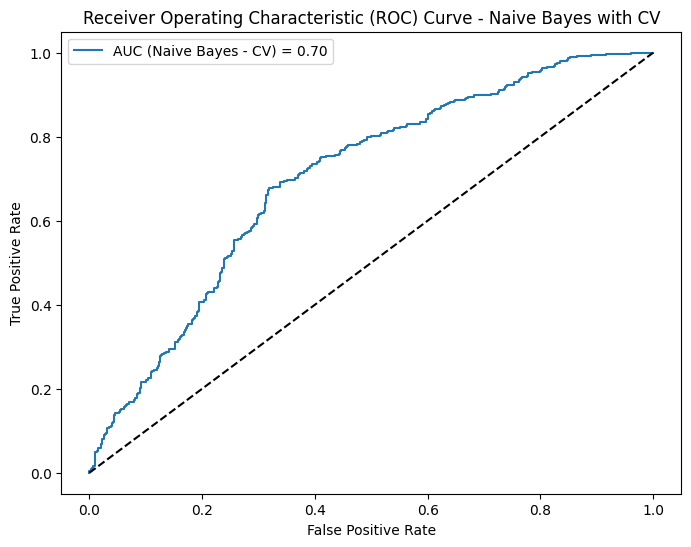

AUC-ROC Score (Naive Bayes - CV): 0.7009308608620902


In [160]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]
}

# Create a Gaussian Naive Bayes Classifier
nb_classifier = GaussianNB()

# Create GridSearchCV
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, scoring='roc_auc', cv=5)

# Fit the model to the polynomial features of the resampled training data
grid_search.fit(x_resampled_poly, y_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions on the test data
y_pred_nb_cv = grid_search.predict(x_test_poly)

# Evaluate the Naive Bayes model with cross-validation and hyperparameter tuning
print("\nConfusion Matrix (Naive Bayes - CV):\n", confusion_matrix(y_test, y_pred_nb_cv))
print("\nClassification Report (Naive Bayes - CV):\n", classification_report(y_test, y_pred_nb_cv))

# Predict probabilities for the positive class
y_prob_nb_cv = grid_search.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for Naive Bayes with cross-validation
fpr_nb_cv, tpr_nb_cv, thresholds_nb_cv = roc_curve(y_test, y_prob_nb_cv)
roc_auc_nb_cv = roc_auc_score(y_test, y_prob_nb_cv)

# Plot the ROC curve for Naive Bayes with cross-validation
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb_cv, tpr_nb_cv, label=f'AUC (Naive Bayes - CV) = {roc_auc_nb_cv:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes with CV')
plt.legend()
plt.show()

# Print AUC score for Naive Bayes with cross-validation
print("AUC-ROC Score (Naive Bayes - CV):", roc_auc_nb_cv)

### Model - Support VECTOR classifier


Confusion Matrix (SVC):
 [[308 171]
 [112 313]]

Classification Report (SVC):
               precision    recall  f1-score   support

           0       0.73      0.64      0.69       479
           1       0.65      0.74      0.69       425

    accuracy                           0.69       904
   macro avg       0.69      0.69      0.69       904
weighted avg       0.69      0.69      0.69       904



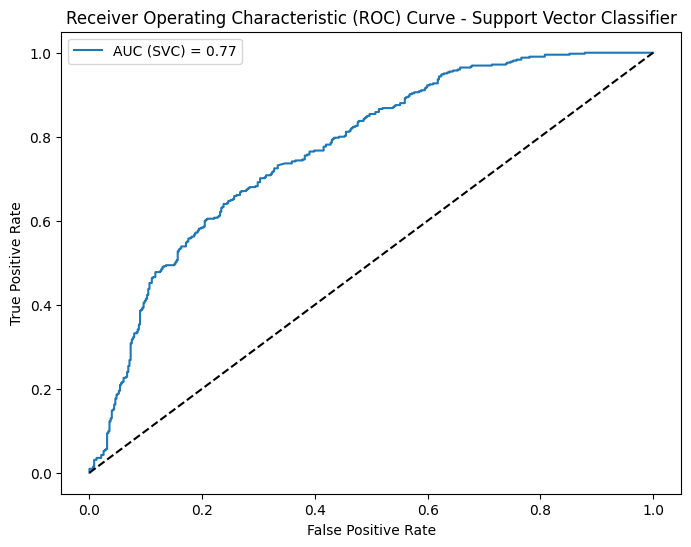

AUC-ROC Score (SVC): 0.7689647550042981


In [161]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create a Support Vector Classifier
svc_classifier = SVC(probability=True, random_state=42)

# Fit the model to the polynomial features of the resampled training data
svc_classifier.fit(x_resampled_poly, y_resampled)

# Make predictions on the test data
y_pred_svc = svc_classifier.predict(x_test_poly)

# Evaluate the Support Vector Classifier
print("\nConfusion Matrix (SVC):\n", confusion_matrix(y_test, y_pred_svc))
print("\nClassification Report (SVC):\n", classification_report(y_test, y_pred_svc))

# Predict probabilities for the positive class
y_prob_svc = svc_classifier.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for Support Vector Classifier
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_prob_svc)
roc_auc_svc = roc_auc_score(y_test, y_prob_svc)

# Plot the ROC curve for Support Vector Classifier
plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, label=f'AUC (SVC) = {roc_auc_svc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Support Vector Classifier')
plt.legend()
plt.show()

# Print AUC score for Support Vector Classifier
print("AUC-ROC Score (SVC):", roc_auc_svc)

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Confusion Matrix (Tuned SVC):
 [[342 137]
 [105 320]]

Classification Report (Tuned SVC):
               precision    recall  f1-score   support

           0       0.77      0.71      0.74       479
           1       0.70      0.75      0.73       425

    accuracy                           0.73       904
   macro avg       0.73      0.73      0.73       904
weighted avg       0.73      0.73      0.73       904



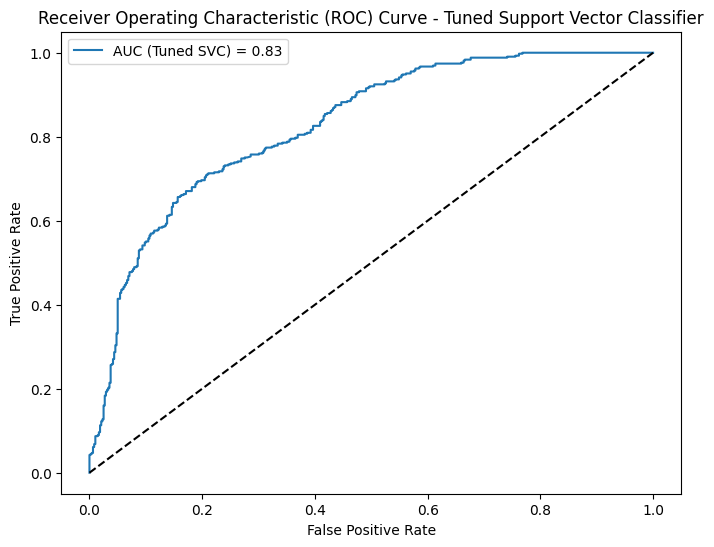

AUC-ROC Score (Tuned SVC): 0.8260960334029228


In [162]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create a Support Vector Classifier
svc_classifier = SVC(probability=True, random_state=42)

# Create a scorer for ROC-AUC
roc_auc_scorer = make_scorer(roc_auc_score)

# Create a GridSearchCV instance
grid_search_svc = GridSearchCV(
    svc_classifier,
    param_grid,
    cv=5,  # Adjust the number of folds as needed
    scoring=roc_auc_scorer
)

# Fit the GridSearchCV to the polynomial features of the resampled training data
grid_search_svc.fit(x_resampled_poly, y_resampled)

# Get the best parameters from the grid search
best_params_svc = grid_search_svc.best_params_
print("Best Parameters:", best_params_svc)

# Make predictions on the test data using the best model from grid search
y_pred_svc_tuned = grid_search_svc.predict(x_test_poly)

# Evaluate the tuned Support Vector Classifier
print("\nConfusion Matrix (Tuned SVC):\n", confusion_matrix(y_test, y_pred_svc_tuned))
print("\nClassification Report (Tuned SVC):\n", classification_report(y_test, y_pred_svc_tuned))

# Predict probabilities for the positive class
y_prob_svc_tuned = grid_search_svc.predict_proba(x_test_poly)[:, 1]

# Calculate AUC-ROC curve and score for Tuned Support Vector Classifier
fpr_svc_tuned, tpr_svc_tuned, thresholds_svc_tuned = roc_curve(y_test, y_prob_svc_tuned)
roc_auc_svc_tuned = roc_auc_score(y_test, y_prob_svc_tuned)

# Plot the ROC curve for Tuned Support Vector Classifier
plt.figure(figsize=(8, 6))
plt.plot(fpr_svc_tuned, tpr_svc_tuned, label=f'AUC (Tuned SVC) = {roc_auc_svc_tuned:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Tuned Support Vector Classifier')
plt.legend()
plt.show()

# Print AUC score for Tuned Support Vector Classifier
print("AUC-ROC Score (Tuned SVC):", roc_auc_svc_tuned)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***